# Setup and Data

In [1]:
from inflation_analysis import calculate_price_indexes, tri_grouping, output_data, output_obs_table, price_index_over_time, top_abs_weight_differences, top_price_index_contributors, tri_grouping_extended, index_comparison

In [2]:
# Parameters
start_year = 2014
end_year = 2022
top_n = 5
comparison_level = 'primary'
data_folder="/Users/roykisluk/Downloads/Consumer_Expenditure_Survey/"
base_year = start_year
comparison_year = end_year

# Grouping
if start_year >= 2014: # After 2014, it is possible to identify secular, conservative, and religious groups
    demo, income, ses, total_mmb = tri_grouping_extended(start_year, end_year, cex_data_folder = data_folder)
else:
    demo, income, ses, total_mmb = tri_grouping(start_year, end_year, cex_data_folder = data_folder)

In [3]:
# Prepare data: calculate price indexes for each group, {comparison_level} and primary categories, and total
demo_analysis, demo_mmb = output_data(demo, start_year, end_year, base_year, data_folder)
income_analysis, income_mmb = output_data(income, start_year, end_year, base_year, data_folder)
ses_analysis, ses_mmb = output_data(ses, start_year, end_year, base_year, data_folder)

# General population
gen_pop_df, gen_pop_secondary_df, gen_pop_primary_df, gen_pop_yearly_price_index = calculate_price_indexes(start_year, end_year, base_year, cex_data_folder=data_folder)
gen_pop = {
    'combined_secondary_df': gen_pop_secondary_df,
    'combined_primary_df': gen_pop_primary_df,
    'yearly_price_index': gen_pop_yearly_price_index
}

Processing group 1/7 (Secular)
Processing group 2/7 (Conservative)
Processing group 3/7 (Religious)
Processing group 4/7 (Haredi)
Processing group 5/7 (Arabs)
Processing group 6/7 (Young)
Processing group 7/7 (Old)
Processing group 1/10 (1)
Processing group 2/10 (2)
Processing group 3/10 (3)
Processing group 4/10 (4)
Processing group 5/10 (5)
Processing group 6/10 (6)
Processing group 7/10 (7)
Processing group 8/10 (8)
Processing group 9/10 (9)
Processing group 10/10 (10)
Processing group 1/5 (1)
Processing group 2/5 (2)
Processing group 3/5 (3)
Processing group 4/5 (4)
Processing group 5/5 (5)


# Output

## Tables

In [4]:
# Observations tables
output_obs_table(start_year, end_year, demo_mmb)

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Secular,3909 (46.23%),3736 (43.75%),4021 (45.24%),4114 (45.83%),4055 (46.34%),3668 (46.96%),2750 (49.71%),2690 (44.65%),2294 (41.99%)
Conservative,2242 (26.52%),2409 (28.21%),2395 (26.94%),2455 (27.35%),2370 (27.08%),2117 (27.1%),1460 (26.39%),1577 (26.18%),1602 (29.32%)
Religious,1140 (13.48%),1257 (14.72%),1244 (13.99%),1290 (14.37%),1185 (13.54%),1218 (15.59%),809 (14.62%),1035 (17.18%),808 (14.79%)
Haredi,642 (7.59%),734 (8.59%),778 (8.75%),757 (8.43%),786 (8.98%),565 (7.23%),440 (7.95%),551 (9.15%),595 (10.89%)
Arabs,1154 (13.65%),1136 (13.3%),1273 (14.32%),1327 (14.78%),1145 (13.08%),1103 (14.12%),513 (9.27%),951 (15.79%),727 (13.31%)
Young,1302 (15.4%),1340 (15.69%),1354 (15.23%),1358 (15.13%),1278 (14.6%),1108 (14.19%),718 (12.98%),877 (14.56%),820 (15.01%)
Old,1711 (20.24%),2091 (24.48%),2372 (26.68%),2348 (26.16%),2375 (27.14%),2279 (29.18%),1786 (32.28%),1779 (29.53%),1663 (30.44%)
Total,8455 (100.0%),8540 (100.0%),8889 (100.0%),8977 (100.0%),8751 (100.0%),7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


In [5]:
output_obs_table(start_year, end_year, income_mmb)

,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,929 (10.99%),873 (10.22%),890 (10.01%),940 (10.47%),880 (10.06%),646 (8.27%),397 (7.18%),503 (8.35%),515 (9.43%)
2,940 (11.12%),929 (10.88%),948 (10.66%),1018 (11.34%),931 (10.64%),710 (9.09%),474 (8.57%),517 (8.58%),537 (9.83%)
3,906 (10.72%),927 (10.85%),928 (10.44%),916 (10.2%),921 (10.52%),708 (9.06%),495 (8.95%),548 (9.1%),554 (10.14%)
4,823 (9.73%),862 (10.09%),893 (10.05%),911 (10.15%),860 (9.83%),759 (9.72%),483 (8.73%),563 (9.35%),562 (10.29%)
5,802 (9.49%),832 (9.74%),849 (9.55%),874 (9.74%),896 (10.24%),748 (9.58%),527 (9.53%),589 (9.78%),516 (9.45%)
6,792 (9.37%),816 (9.56%),871 (9.8%),869 (9.68%),822 (9.39%),776 (9.93%),560 (10.12%),608 (10.09%),545 (9.98%)
7,786 (9.3%),830 (9.72%),879 (9.89%),863 (9.61%),856 (9.78%),781 (10.0%),586 (10.59%),595 (9.88%),536 (9.81%)
8,817 (9.66%),814 (9.53%),875 (9.84%),885 (9.86%),860 (9.83%),851 (10.89%),639 (11.55%),655 (10.87%),551 (10.09%)
9,828 (9.79%),818 (9.58%),888 (9.99%),861 (9.59%),870 (9.94%),891 (11.41%),654 (11.82%),712 (11.82%),550 (10.07%)
10,842 (9.96%),849 (9.94%),882 (9.92%),880 (9.8%),896 (10.24%),957 (12.25%),778 (14.06%),767 (12.73%),612 (11.2%)


In [6]:
output_obs_table(start_year, end_year, ses_mmb)

,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,612 (7.24%),616 (7.21%),695 (7.82%),728 (8.11%),654 (7.47%),1146 (14.67%),807 (14.59%),1204 (19.99%),1211 (22.17%)
2,1912 (22.61%),1916 (22.44%),2021 (22.74%),1977 (22.02%),1882 (21.51%),1017 (13.02%),564 (10.2%),804 (13.35%),753 (13.78%)
3,3415 (40.39%),3495 (40.93%),3523 (39.63%),3627 (40.4%),3624 (41.41%),1911 (24.47%),1490 (26.93%),1503 (24.95%),1352 (24.75%)
4,2420 (28.62%),2402 (28.13%),2569 (28.9%),2583 (28.77%),2505 (28.63%),3564 (45.63%),2556 (46.2%),2393 (39.72%),2016 (36.9%)
5,106 (1.25%),121 (1.42%),95 (1.07%),102 (1.14%),127 (1.45%),189 (2.42%),163 (2.95%),153 (2.54%),146 (2.67%)
Total,8455 (100.0%),8540 (100.0%),8889 (100.0%),8977 (100.0%),8751 (100.0%),7811 (100.0%),5532 (100.0%),6024 (100.0%),5463 (100.0%)


## Plots

### Yearly Price Index Comparison Between Groups

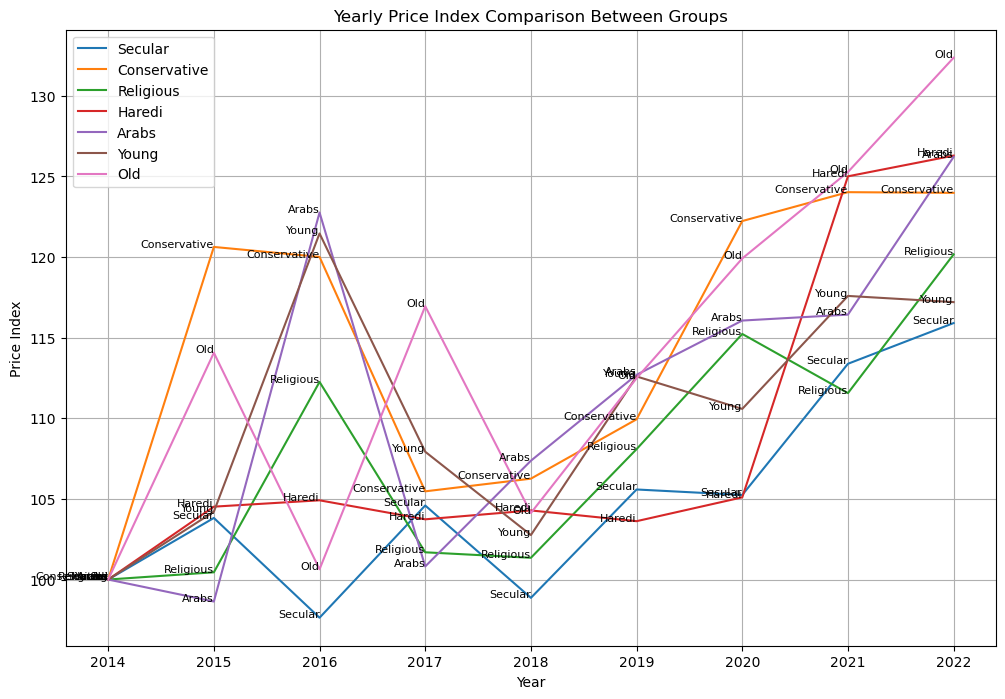

In [27]:
price_index_over_time(demo_analysis)

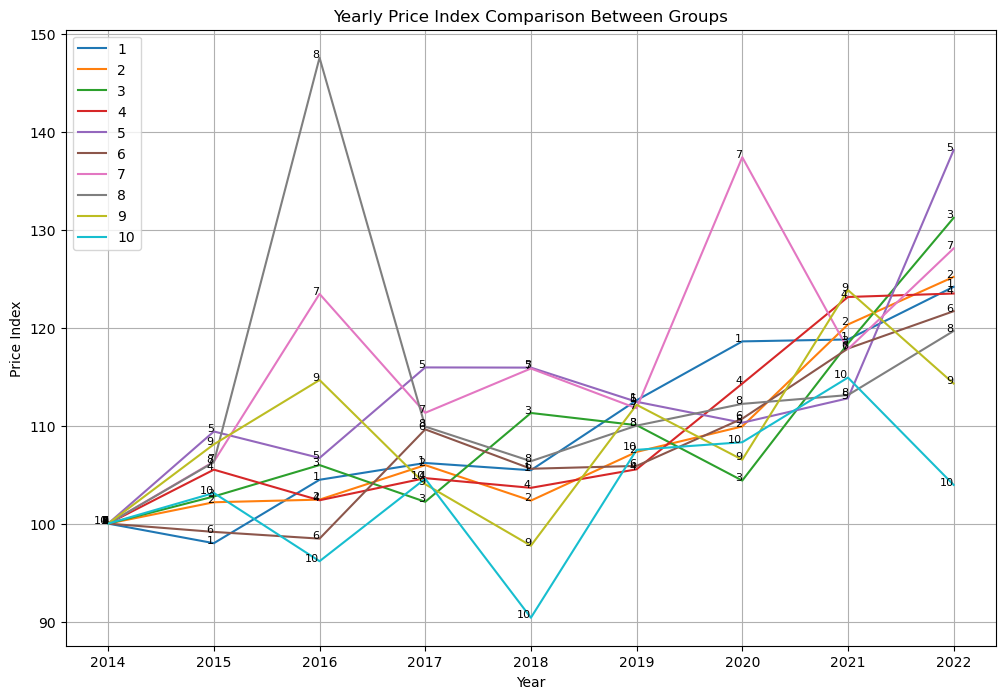

In [28]:
price_index_over_time(income_analysis)

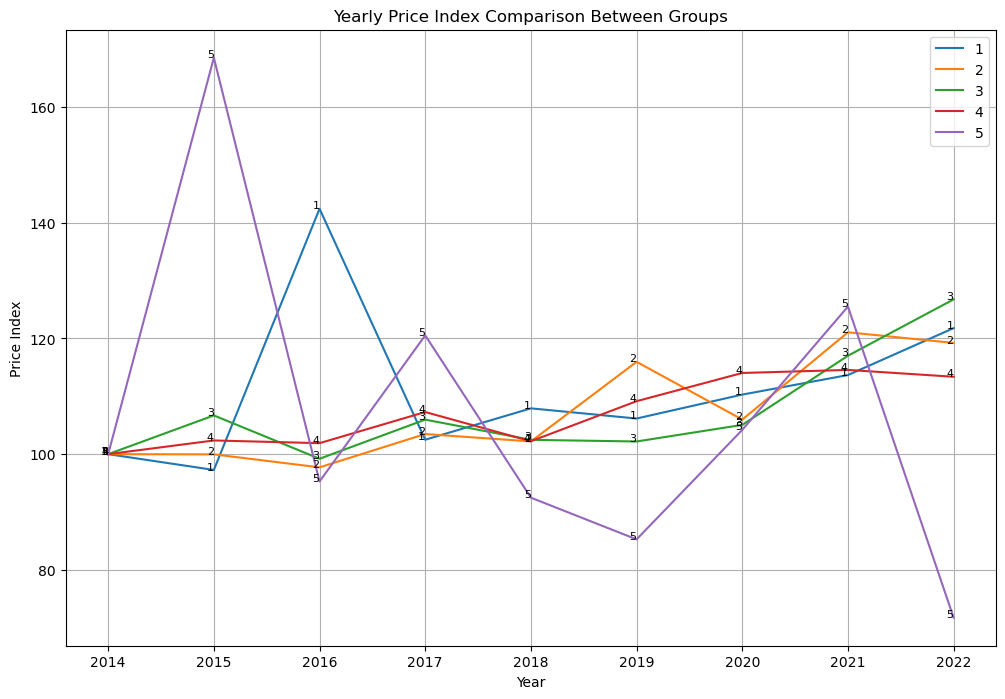

In [29]:
price_index_over_time(ses_analysis)

### Top Weight Differences

In [10]:
# Define control group
weights_comparison_control = gen_pop[f'combined_{comparison_level}_df'][gen_pop[f'combined_{comparison_level}_df']['Year'] == comparison_year]

,Year,prodcode,price_index,weight,description,weight_diff
85,2022,35,99.355395,0.067909,Clothing And Footwear Total,-0.004317
80,2022,30,125.037954,0.253521,Food Total Excluding Fruits And Vegetables,-0.005187
81,2022,31,123.871273,0.059133,Vegetables And Fruits Total,-0.005800
89,2022,39,121.903005,0.068515,Miscellaneous Goods And Services Total,-0.006583
83,2022,33,121.099681,0.092865,Dwelling And Household Maintenance Total,-0.011355
88,2022,38,99.638609,0.194446,Transport And Communication Total,0.012317
87,2022,37,104.020916,0.118493,Education Culture And Entertainment Total,0.009911
82,2022,32,115.743909,0.036426,Housing Total,0.006518
86,2022,36,139.385610,0.057627,Health Total,0.003968
84,2022,34,128.993361,0.051065,Furniture And Household Equipment Total,0.000529


,Year,prodcode,price_index,weight,description,weight_diff
83,2022,33,125.151476,0.099759,Dwelling And Household Maintenance Total,-0.004462
84,2022,34,117.810556,0.044826,Furniture And Household Equipment Total,-0.005710
86,2022,36,145.916153,0.046192,Health Total,-0.007467
82,2022,32,112.681586,0.019577,Housing Total,-0.010331
87,2022,37,149.201702,0.090086,Education Culture And Entertainment Total,-0.018497
89,2022,39,122.792507,0.087855,Miscellaneous Goods And Services Total,0.012757
85,2022,35,109.941675,0.082409,Clothing And Footwear Total,0.010183
80,2022,30,139.244162,0.267829,Food Total Excluding Fruits And Vegetables,0.009121
88,2022,38,93.348005,0.190857,Transport And Communication Total,0.008728
81,2022,31,125.611712,0.070611,Vegetables And Fruits Total,0.005677


,Year,prodcode,price_index,weight,description,weight_diff
86,2022,36,99.916741,0.048408,Health Total,-0.005251
85,2022,35,114.817303,0.066841,Clothing And Footwear Total,-0.005385
82,2022,32,154.889397,0.024162,Housing Total,-0.005746
89,2022,39,129.539129,0.063525,Miscellaneous Goods And Services Total,-0.011573
87,2022,37,120.462242,0.082538,Education Culture And Entertainment Total,-0.026044
83,2022,33,99.591243,0.138366,Dwelling And Household Maintenance Total,0.034145
80,2022,30,128.472670,0.267699,Food Total Excluding Fruits And Vegetables,0.008991
81,2022,31,127.225643,0.073698,Vegetables And Fruits Total,0.008764
88,2022,38,108.177429,0.185890,Transport And Communication Total,0.003762
84,2022,34,165.392445,0.048874,Furniture And Household Equipment Total,-0.001662


,Year,prodcode,price_index,weight,description,weight_diff
82,2022,32,97.243248,0.034580,Housing Total,0.004672
84,2022,34,134.682994,0.048474,Furniture And Household Equipment Total,-0.002062
89,2022,39,110.232974,0.070120,Miscellaneous Goods And Services Total,-0.004978
87,2022,37,119.560523,0.081477,Education Culture And Entertainment Total,-0.027105
88,2022,38,138.156756,0.123288,Transport And Communication Total,-0.058841
80,2022,30,131.756362,0.305119,Food Total Excluding Fruits And Vegetables,0.046412
81,2022,31,128.077220,0.082644,Vegetables And Fruits Total,0.017710
85,2022,35,114.187599,0.085753,Clothing And Footwear Total,0.013527
86,2022,36,105.610548,0.059418,Health Total,0.005759
83,2022,33,137.833215,0.109125,Dwelling And Household Maintenance Total,0.004904


,Year,prodcode,price_index,weight,description,weight_diff
88,2022,38,108.483797,0.174038,Transport And Communication Total,-0.008091
86,2022,36,108.007623,0.038610,Health Total,-0.015049
84,2022,34,114.782040,0.032154,Furniture And Household Equipment Total,-0.018382
87,2022,37,120.191941,0.088842,Education Culture And Entertainment Total,-0.019740
82,2022,32,166.718859,0.009020,Housing Total,-0.020888
83,2022,33,119.561450,0.128231,Dwelling And Household Maintenance Total,0.024010
85,2022,35,102.880461,0.094407,Clothing And Footwear Total,0.022180
80,2022,30,152.927184,0.278153,Food Total Excluding Fruits And Vegetables,0.019445
81,2022,31,134.824900,0.075158,Vegetables And Fruits Total,0.010224
89,2022,39,117.604923,0.081388,Miscellaneous Goods And Services Total,0.006290


,Year,prodcode,price_index,weight,description,weight_diff
84,2022,34,92.946542,0.048308,Furniture And Household Equipment Total,-0.002228
88,2022,38,100.683031,0.173574,Transport And Communication Total,-0.008555
83,2022,33,127.775994,0.093237,Dwelling And Household Maintenance Total,-0.010983
86,2022,36,117.389856,0.039494,Health Total,-0.014165
87,2022,37,119.593215,0.089872,Education Culture And Entertainment Total,-0.018710
80,2022,30,129.796773,0.277469,Food Total Excluding Fruits And Vegetables,0.018761
85,2022,35,90.972540,0.084941,Clothing And Footwear Total,0.012715
82,2022,32,133.931362,0.042022,Housing Total,0.012115
89,2022,39,121.450321,0.086234,Miscellaneous Goods And Services Total,0.011136
81,2022,31,124.865827,0.064849,Vegetables And Fruits Total,-0.000085


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,120.693851,0.067820,Miscellaneous Goods And Services Total,-0.007278
82,2022,32,172.779386,0.021093,Housing Total,-0.008815
85,2022,35,99.614828,0.047335,Clothing And Footwear Total,-0.024891
87,2022,37,129.752342,0.074992,Education Culture And Entertainment Total,-0.033591
88,2022,38,105.075280,0.145014,Transport And Communication Total,-0.037115
86,2022,36,139.446588,0.095248,Health Total,0.041589
81,2022,31,129.735488,0.090768,Vegetables And Fruits Total,0.025834
80,2022,30,130.378708,0.282267,Food Total Excluding Fruits And Vegetables,0.023559
83,2022,33,170.643074,0.127082,Dwelling And Household Maintenance Total,0.022862
84,2022,34,150.938399,0.048383,Furniture And Household Equipment Total,-0.002153


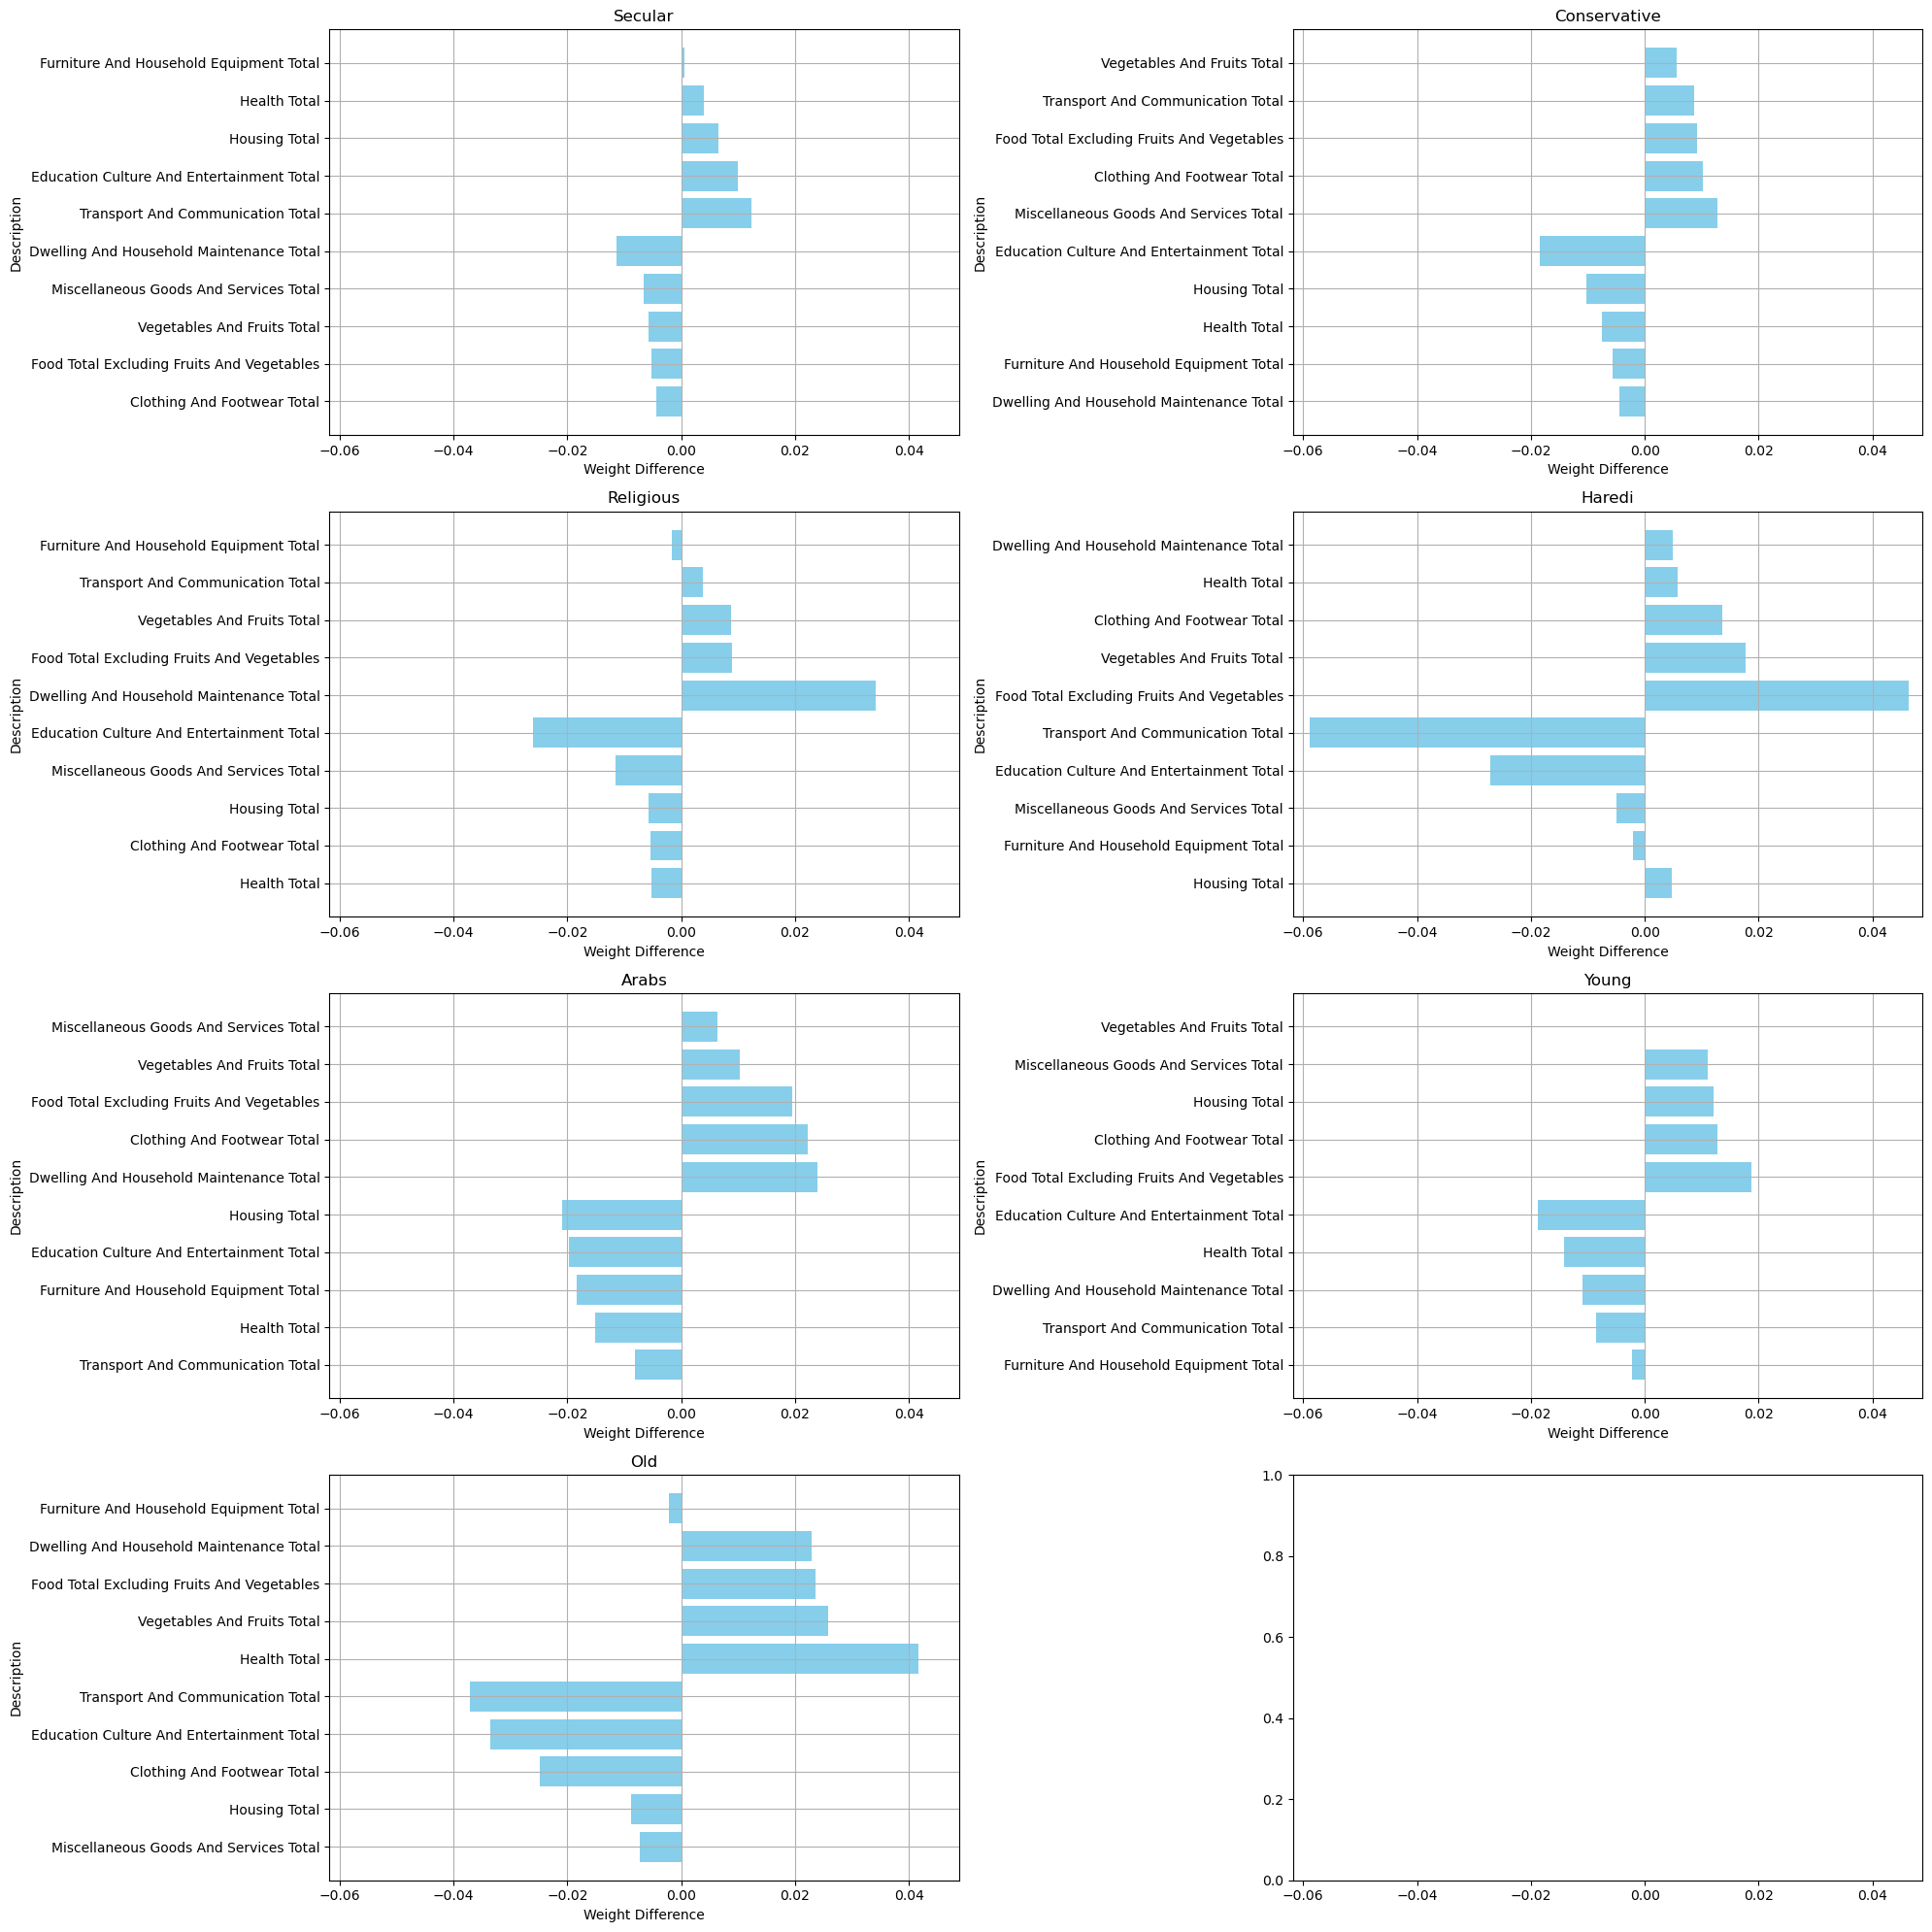

In [11]:
# Top weight differences - demograhic groups
demo_comparison_groups = {}
for group in demo_analysis:
    demo_comparison_groups[group] = demo_analysis[group][f'combined_{comparison_level}_df'][demo_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(demo_comparison_groups, weights_comparison_control, top_n)

In [12]:
index_comparison(demo_comparison_groups, weights_comparison_control)

,group,Control,Arabs,Conservative,Haredi,Old,Religious,Secular,Young
prodcode,description,,,,,,,,
30,Food Total Excluding Fruits And Vegetables,129.67(0.2587),152.93(0.2782),139.24(0.2678),131.76(0.3051),130.38(0.2823),128.47(0.2677),125.04(0.2535),129.80(0.2775)
31,Vegetables And Fruits Total,123.00(0.0649),134.82(0.0752),125.61(0.0706),128.08(0.0826),129.74(0.0908),127.23(0.0737),123.87(0.0591),124.87(0.0648)
32,Housing Total,113.42(0.0299),166.72(0.0090),112.68(0.0196),97.24(0.0346),172.78(0.0211),154.89(0.0242),115.74(0.0364),133.93(0.0420)
33,Dwelling And Household Maintenance Total,123.72(0.1042),119.56(0.1282),125.15(0.0998),137.83(0.1091),170.64(0.1271),99.59(0.1384),121.10(0.0929),127.78(0.0932)
34,Furniture And Household Equipment Total,118.53(0.0505),114.78(0.0322),117.81(0.0448),134.68(0.0485),150.94(0.0484),165.39(0.0489),128.99(0.0511),92.95(0.0483)
35,Clothing And Footwear Total,104.40(0.0722),102.88(0.0944),109.94(0.0824),114.19(0.0858),99.61(0.0473),114.82(0.0668),99.36(0.0679),90.97(0.0849)
36,Health Total,127.27(0.0537),108.01(0.0386),145.92(0.0462),105.61(0.0594),139.45(0.0952),99.92(0.0484),139.39(0.0576),117.39(0.0395)
37,Education Culture And Entertainment Total,109.47(0.1086),120.19(0.0888),149.20(0.0901),119.56(0.0815),129.75(0.0750),120.46(0.0825),104.02(0.1185),119.59(0.0899)
38,Transport And Communication Total,100.44(0.1821),108.48(0.1740),93.35(0.1909),138.16(0.1233),105.08(0.1450),108.18(0.1859),99.64(0.1944),100.68(0.1736)


,Year,prodcode,price_index,weight,description,weight_diff
85,2022,35,118.811748,0.076073,Clothing And Footwear Total,0.003846
86,2022,36,140.654533,0.040897,Health Total,-0.012762
84,2022,34,129.088342,0.023218,Furniture And Household Equipment Total,-0.027318
87,2022,37,95.811640,0.074812,Education Culture And Entertainment Total,-0.033770
88,2022,38,113.118694,0.132622,Transport And Communication Total,-0.049507
80,2022,30,134.946437,0.314222,Food Total Excluding Fruits And Vegetables,0.055514
82,2022,32,130.608098,0.057821,Housing Total,0.027913
81,2022,31,132.011098,0.079137,Vegetables And Fruits Total,0.014203
89,2022,39,121.967730,0.088733,Miscellaneous Goods And Services Total,0.013635
83,2022,33,115.460750,0.112466,Dwelling And Household Maintenance Total,0.008245


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,126.827307,0.083587,Miscellaneous Goods And Services Total,0.008489
86,2022,36,99.874909,0.050322,Health Total,-0.003337
84,2022,34,111.585442,0.032430,Furniture And Household Equipment Total,-0.018106
87,2022,37,105.690495,0.077133,Education Culture And Entertainment Total,-0.031450
88,2022,38,108.323297,0.126761,Transport And Communication Total,-0.055368
80,2022,30,137.864659,0.307805,Food Total Excluding Fruits And Vegetables,0.049097
81,2022,31,132.658802,0.082322,Vegetables And Fruits Total,0.017389
83,2022,33,137.057558,0.116200,Dwelling And Household Maintenance Total,0.011980
85,2022,35,101.369205,0.083167,Clothing And Footwear Total,0.010940
82,2022,32,157.322445,0.040274,Housing Total,0.010366


,Year,prodcode,price_index,weight,description,weight_diff
86,2022,36,114.222577,0.056333,Health Total,0.002674
84,2022,34,121.452888,0.038379,Furniture And Household Equipment Total,-0.012157
83,2022,33,139.189305,0.089775,Dwelling And Household Maintenance Total,-0.014445
88,2022,38,116.885019,0.161987,Transport And Communication Total,-0.020142
87,2022,37,227.977896,0.069504,Education Culture And Entertainment Total,-0.039079
80,2022,30,132.810609,0.294554,Food Total Excluding Fruits And Vegetables,0.035846
82,2022,32,77.454315,0.048132,Housing Total,0.018225
81,2022,31,123.830353,0.076678,Vegetables And Fruits Total,0.011744
85,2022,35,130.049962,0.083358,Clothing And Footwear Total,0.011132
89,2022,39,118.723676,0.081300,Miscellaneous Goods And Services Total,0.006202


,Year,prodcode,price_index,weight,description,weight_diff
85,2022,35,119.755758,0.066303,Clothing And Footwear Total,-0.005923
86,2022,36,160.831371,0.043573,Health Total,-0.010086
84,2022,34,116.100078,0.039759,Furniture And Household Equipment Total,-0.010777
87,2022,37,98.172014,0.085767,Education Culture And Entertainment Total,-0.022815
88,2022,38,111.048650,0.151995,Transport And Communication Total,-0.030134
80,2022,30,130.294903,0.286866,Food Total Excluding Fruits And Vegetables,0.028158
83,2022,33,111.481483,0.129490,Dwelling And Household Maintenance Total,0.025270
82,2022,32,151.747211,0.043328,Housing Total,0.013420
81,2022,31,131.281541,0.075054,Vegetables And Fruits Total,0.010120
89,2022,39,133.303663,0.077865,Miscellaneous Goods And Services Total,0.002767


,Year,prodcode,price_index,weight,description,weight_diff
82,2022,32,138.353216,0.025932,Housing Total,-0.003975
83,2022,33,137.991870,0.099811,Dwelling And Household Maintenance Total,-0.004410
87,2022,37,209.769341,0.098976,Education Culture And Entertainment Total,-0.009606
84,2022,34,134.319706,0.036132,Furniture And Household Equipment Total,-0.014404
88,2022,38,127.876045,0.153969,Transport And Communication Total,-0.028160
80,2022,30,135.737758,0.289401,Food Total Excluding Fruits And Vegetables,0.030693
85,2022,35,90.616395,0.092602,Clothing And Footwear Total,0.020375
81,2022,31,136.348868,0.072980,Vegetables And Fruits Total,0.008047
89,2022,39,130.931906,0.077043,Miscellaneous Goods And Services Total,0.001945
86,2022,36,145.595712,0.053154,Health Total,-0.000505


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,127.737478,0.075367,Miscellaneous Goods And Services Total,0.000269
82,2022,32,97.496366,0.030085,Housing Total,0.000177
84,2022,34,175.026903,0.042921,Furniture And Household Equipment Total,-0.007615
87,2022,37,101.527568,0.090545,Education Culture And Entertainment Total,-0.018037
88,2022,38,105.121708,0.163281,Transport And Communication Total,-0.018848
80,2022,30,128.168354,0.287530,Food Total Excluding Fruits And Vegetables,0.028822
81,2022,31,127.375392,0.073896,Vegetables And Fruits Total,0.008963
83,2022,33,119.378523,0.107347,Dwelling And Household Maintenance Total,0.003126
85,2022,35,116.879390,0.073889,Clothing And Footwear Total,0.001662
86,2022,36,136.606968,0.055138,Health Total,0.001479


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,130.853381,0.073395,Miscellaneous Goods And Services Total,-0.001703
86,2022,36,137.180553,0.049652,Health Total,-0.004007
84,2022,34,128.090316,0.041420,Furniture And Household Equipment Total,-0.009116
87,2022,37,114.123312,0.097915,Education Culture And Entertainment Total,-0.010667
88,2022,38,89.754408,0.167272,Transport And Communication Total,-0.014857
80,2022,30,124.853003,0.291126,Food Total Excluding Fruits And Vegetables,0.032419
81,2022,31,124.657576,0.069332,Vegetables And Fruits Total,0.004399
82,2022,32,127.022817,0.031974,Housing Total,0.002066
85,2022,35,106.162316,0.073905,Clothing And Footwear Total,0.001679
83,2022,33,223.829623,0.104009,Dwelling And Household Maintenance Total,-0.000212


,Year,prodcode,price_index,weight,description,weight_diff
85,2022,36,120.681438,0.063352,Health Total,-0.008874
81,2022,32,78.646314,0.026239,Housing Total,-0.038695
83,2022,34,123.478094,0.057065,Furniture And Household Equipment Total,-0.047156
88,2022,39,121.781681,0.074670,Miscellaneous Goods And Services Total,-0.107459
80,2022,31,119.024847,0.068978,Vegetables And Fruits Total,-0.189730
86,2022,37,125.745016,0.114204,Education Culture And Entertainment Total,0.060545
82,2022,33,115.969231,0.085149,Dwelling And Household Maintenance Total,0.055241
87,2022,38,93.360076,0.154350,Transport And Communication Total,0.045768
84,2022,35,112.321821,0.078761,Clothing And Footwear Total,0.028225
85,2022,36,120.681438,0.063352,Health Total,-0.008874


,Year,prodcode,price_index,weight,description,weight_diff
84,2022,34,111.823910,0.047864,Furniture And Household Equipment Total,-0.002672
87,2022,37,113.206718,0.103635,Education Culture And Entertainment Total,-0.004947
85,2022,35,101.463656,0.066129,Clothing And Footwear Total,-0.006097
82,2022,32,120.572665,0.022146,Housing Total,-0.007762
88,2022,38,99.996972,0.171097,Transport And Communication Total,-0.011032
86,2022,36,148.105228,0.069357,Health Total,0.015698
83,2022,33,104.355661,0.113737,Dwelling And Household Maintenance Total,0.009516
80,2022,30,121.421303,0.265471,Food Total Excluding Fruits And Vegetables,0.006763
81,2022,31,120.160408,0.066783,Vegetables And Fruits Total,0.001849
89,2022,39,112.817495,0.073781,Miscellaneous Goods And Services Total,-0.001316


,Year,prodcode,price_index,weight,description,weight_diff
81,2022,31,130.469794,0.057257,Vegetables And Fruits Total,-0.007677
85,2022,36,119.316455,0.063817,Health Total,-0.008409
80,2022,30,120.855150,0.244788,Food Total Excluding Fruits And Vegetables,-0.013920
83,2022,34,122.841775,0.051431,Furniture And Household Equipment Total,-0.052790
88,2022,39,103.251380,0.073132,Miscellaneous Goods And Services Total,-0.108997
86,2022,37,72.139459,0.144809,Education Culture And Entertainment Total,0.091150
87,2022,38,91.009114,0.187867,Transport And Communication Total,0.079285
82,2022,33,105.918025,0.105057,Dwelling And Household Maintenance Total,0.075149
84,2022,35,93.824802,0.071842,Clothing And Footwear Total,0.021306
81,2022,31,130.469794,0.057257,Vegetables And Fruits Total,-0.007677


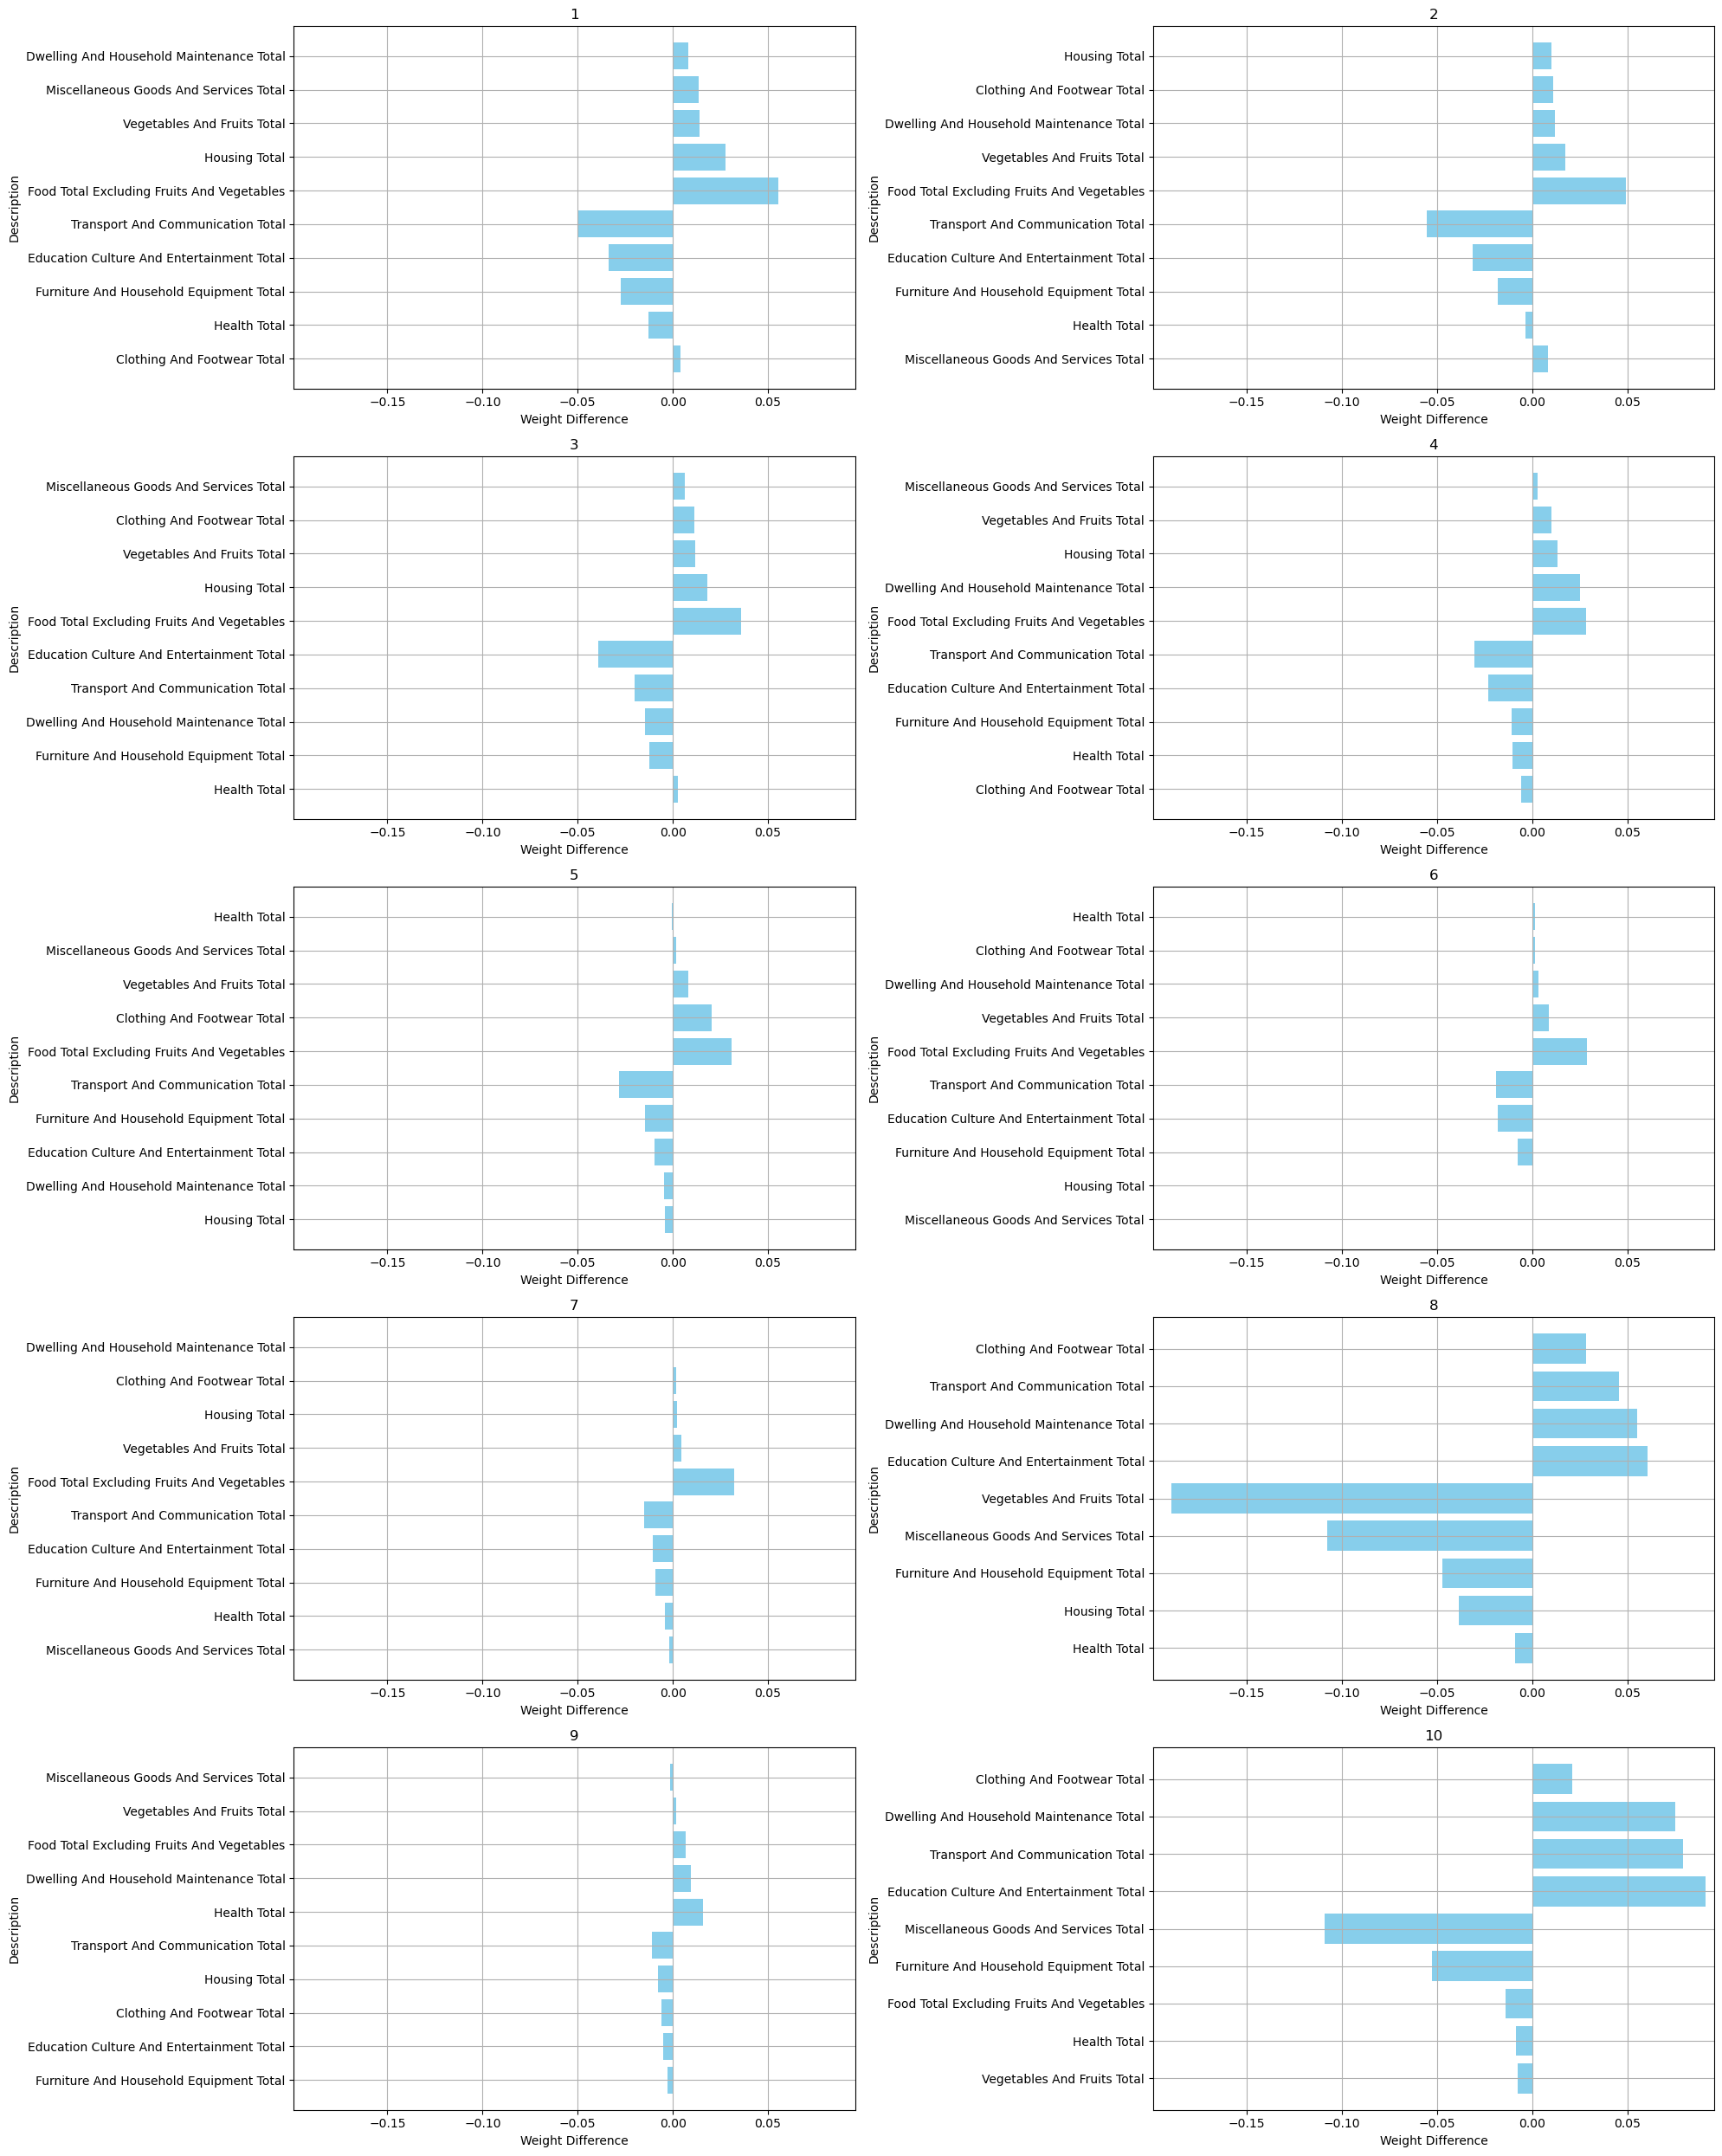

In [13]:
# Top weight differences - income groups
income_comparison_groups = {}
for group in income_analysis:
    income_comparison_groups[group] = income_analysis[group][f'combined_{comparison_level}_df'][income_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(income_comparison_groups, weights_comparison_control, top_n)

In [14]:
index_comparison(income_comparison_groups, weights_comparison_control)

,group,Control,1,2,3,4,5,6,7,8,9,10
prodcode,description,,,,,,,,,,,
30,Food Total Excluding Fruits And Vegetables,129.67(0.2587),134.95(0.3142),137.86(0.3078),132.81(0.2946),130.29(0.2869),135.74(0.2894),128.17(0.2875),124.85(0.2911),137.47(0.2772),121.42(0.2655),120.86(0.2448)
31,Vegetables And Fruits Total,123.00(0.0649),132.01(0.0791),132.66(0.0823),123.83(0.0767),131.28(0.0751),136.35(0.0730),127.38(0.0739),124.66(0.0693),119.02(0.0690),120.16(0.0668),130.47(0.0573)
32,Housing Total,113.42(0.0299),130.61(0.0578),157.32(0.0403),77.45(0.0481),151.75(0.0433),138.35(0.0259),97.50(0.0301),127.02(0.0320),78.65(0.0262),120.57(0.0221),NaN
33,Dwelling And Household Maintenance Total,123.72(0.1042),115.46(0.1125),137.06(0.1162),139.19(0.0898),111.48(0.1295),137.99(0.0998),119.38(0.1073),223.83(0.1040),115.97(0.0851),104.36(0.1137),105.92(0.1051)
34,Furniture And Household Equipment Total,118.53(0.0505),129.09(0.0232),111.59(0.0324),121.45(0.0384),116.10(0.0398),134.32(0.0361),175.03(0.0429),128.09(0.0414),123.48(0.0571),111.82(0.0479),122.84(0.0514)
35,Clothing And Footwear Total,104.40(0.0722),118.81(0.0761),101.37(0.0832),130.05(0.0834),119.76(0.0663),90.62(0.0926),116.88(0.0739),106.16(0.0739),112.32(0.0788),101.46(0.0661),93.82(0.0718)
36,Health Total,127.27(0.0537),140.65(0.0409),99.87(0.0503),114.22(0.0563),160.83(0.0436),145.60(0.0532),136.61(0.0551),137.18(0.0497),120.68(0.0634),148.11(0.0694),119.32(0.0638)
37,Education Culture And Entertainment Total,109.47(0.1086),95.81(0.0748),105.69(0.0771),227.98(0.0695),98.17(0.0858),209.77(0.0990),101.53(0.0905),114.12(0.0979),125.75(0.1142),113.21(0.1036),72.14(0.1448)
38,Transport And Communication Total,100.44(0.1821),113.12(0.1326),108.32(0.1268),116.89(0.1620),111.05(0.1520),127.88(0.1540),105.12(0.1633),89.75(0.1673),93.36(0.1543),100.00(0.1711),91.01(0.1879)


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,117.918737,0.074792,Miscellaneous Goods And Services Total,-0.000306
84,2022,34,118.351680,0.038747,Furniture And Household Equipment Total,-0.011789
86,2022,36,109.415062,0.040972,Health Total,-0.012687
82,2022,32,123.870951,0.006461,Housing Total,-0.023446
87,2022,37,117.920797,0.081227,Education Culture And Entertainment Total,-0.027355
85,2022,35,97.955036,0.097961,Clothing And Footwear Total,0.025735
80,2022,30,147.501697,0.279487,Food Total Excluding Fruits And Vegetables,0.020779
83,2022,33,106.281787,0.121346,Dwelling And Household Maintenance Total,0.017125
81,2022,31,125.827490,0.073874,Vegetables And Fruits Total,0.008941
88,2022,38,110.736869,0.185131,Transport And Communication Total,0.003003


,Year,prodcode,price_index,weight,description,weight_diff
89,2022,39,132.616117,0.078142,Miscellaneous Goods And Services Total,0.003044
86,2022,36,123.967341,0.051508,Health Total,-0.002151
82,2022,32,97.771110,0.024636,Housing Total,-0.005272
84,2022,34,125.799552,0.036340,Furniture And Household Equipment Total,-0.014196
87,2022,37,113.311706,0.087375,Education Culture And Entertainment Total,-0.021207
88,2022,38,95.764503,0.192540,Transport And Communication Total,0.010411
80,2022,30,135.973125,0.268756,Food Total Excluding Fruits And Vegetables,0.010049
81,2022,31,122.069767,0.072839,Vegetables And Fruits Total,0.007905
83,2022,33,124.201319,0.112074,Dwelling And Household Maintenance Total,0.007853
85,2022,35,102.898830,0.075791,Clothing And Footwear Total,0.003564


,Year,prodcode,price_index,weight,description,weight_diff
85,2022,35,111.079887,0.073116,Clothing And Footwear Total,0.000889
83,2022,33,118.878994,0.104586,Dwelling And Household Maintenance Total,0.000365
86,2022,36,146.195520,0.052324,Health Total,-0.001335
87,2022,37,134.594065,0.094165,Education Culture And Entertainment Total,-0.014417
88,2022,38,101.325826,0.150240,Transport And Communication Total,-0.031888
80,2022,30,132.635349,0.281561,Food Total Excluding Fruits And Vegetables,0.022853
89,2022,39,120.352670,0.085020,Miscellaneous Goods And Services Total,0.009922
84,2022,34,182.312488,0.056894,Furniture And Household Equipment Total,0.006358
81,2022,31,126.703743,0.070381,Vegetables And Fruits Total,0.005447
82,2022,32,119.022045,0.031713,Housing Total,0.001806


,Year,prodcode,price_index,weight,description,weight_diff
84,2022,34,125.664055,0.049024,Furniture And Household Equipment Total,-0.001512
81,2022,31,116.477916,0.061365,Vegetables And Fruits Total,-0.003569
89,2022,39,118.653190,0.068194,Miscellaneous Goods And Services Total,-0.006904
83,2022,33,111.675104,0.095652,Dwelling And Household Maintenance Total,-0.008568
88,2022,38,108.547948,0.160880,Transport And Communication Total,-0.021248
87,2022,37,99.430890,0.127068,Education Culture And Entertainment Total,0.018486
82,2022,32,119.292267,0.042745,Housing Total,0.012838
86,2022,36,126.792788,0.061918,Health Total,0.008259
80,2022,30,119.760215,0.261172,Food Total Excluding Fruits And Vegetables,0.002465
85,2022,35,96.780656,0.071981,Clothing And Footwear Total,-0.000246


,Year,prodcode,price_index,weight,description,weight_diff
82,2022,32,2.245614,0.008526,Housing Total,-0.021382
89,2022,39,82.934879,0.038264,Miscellaneous Goods And Services Total,-0.036834
85,2022,35,NaN,0.031881,Clothing And Footwear Total,-0.040345
87,2022,37,76.623640,0.051119,Education Culture And Entertainment Total,-0.057463
80,2022,30,112.855790,0.197677,Food Total Excluding Fruits And Vegetables,-0.061031
88,2022,38,43.990496,0.350590,Transport And Communication Total,0.168461
83,2022,33,59.861293,0.165114,Dwelling And Household Maintenance Total,0.060893
86,2022,36,50.843047,0.076282,Health Total,0.022623
84,2022,34,60.304089,0.033452,Furniture And Household Equipment Total,-0.017084
81,2022,31,171.355387,0.047096,Vegetables And Fruits Total,-0.017838


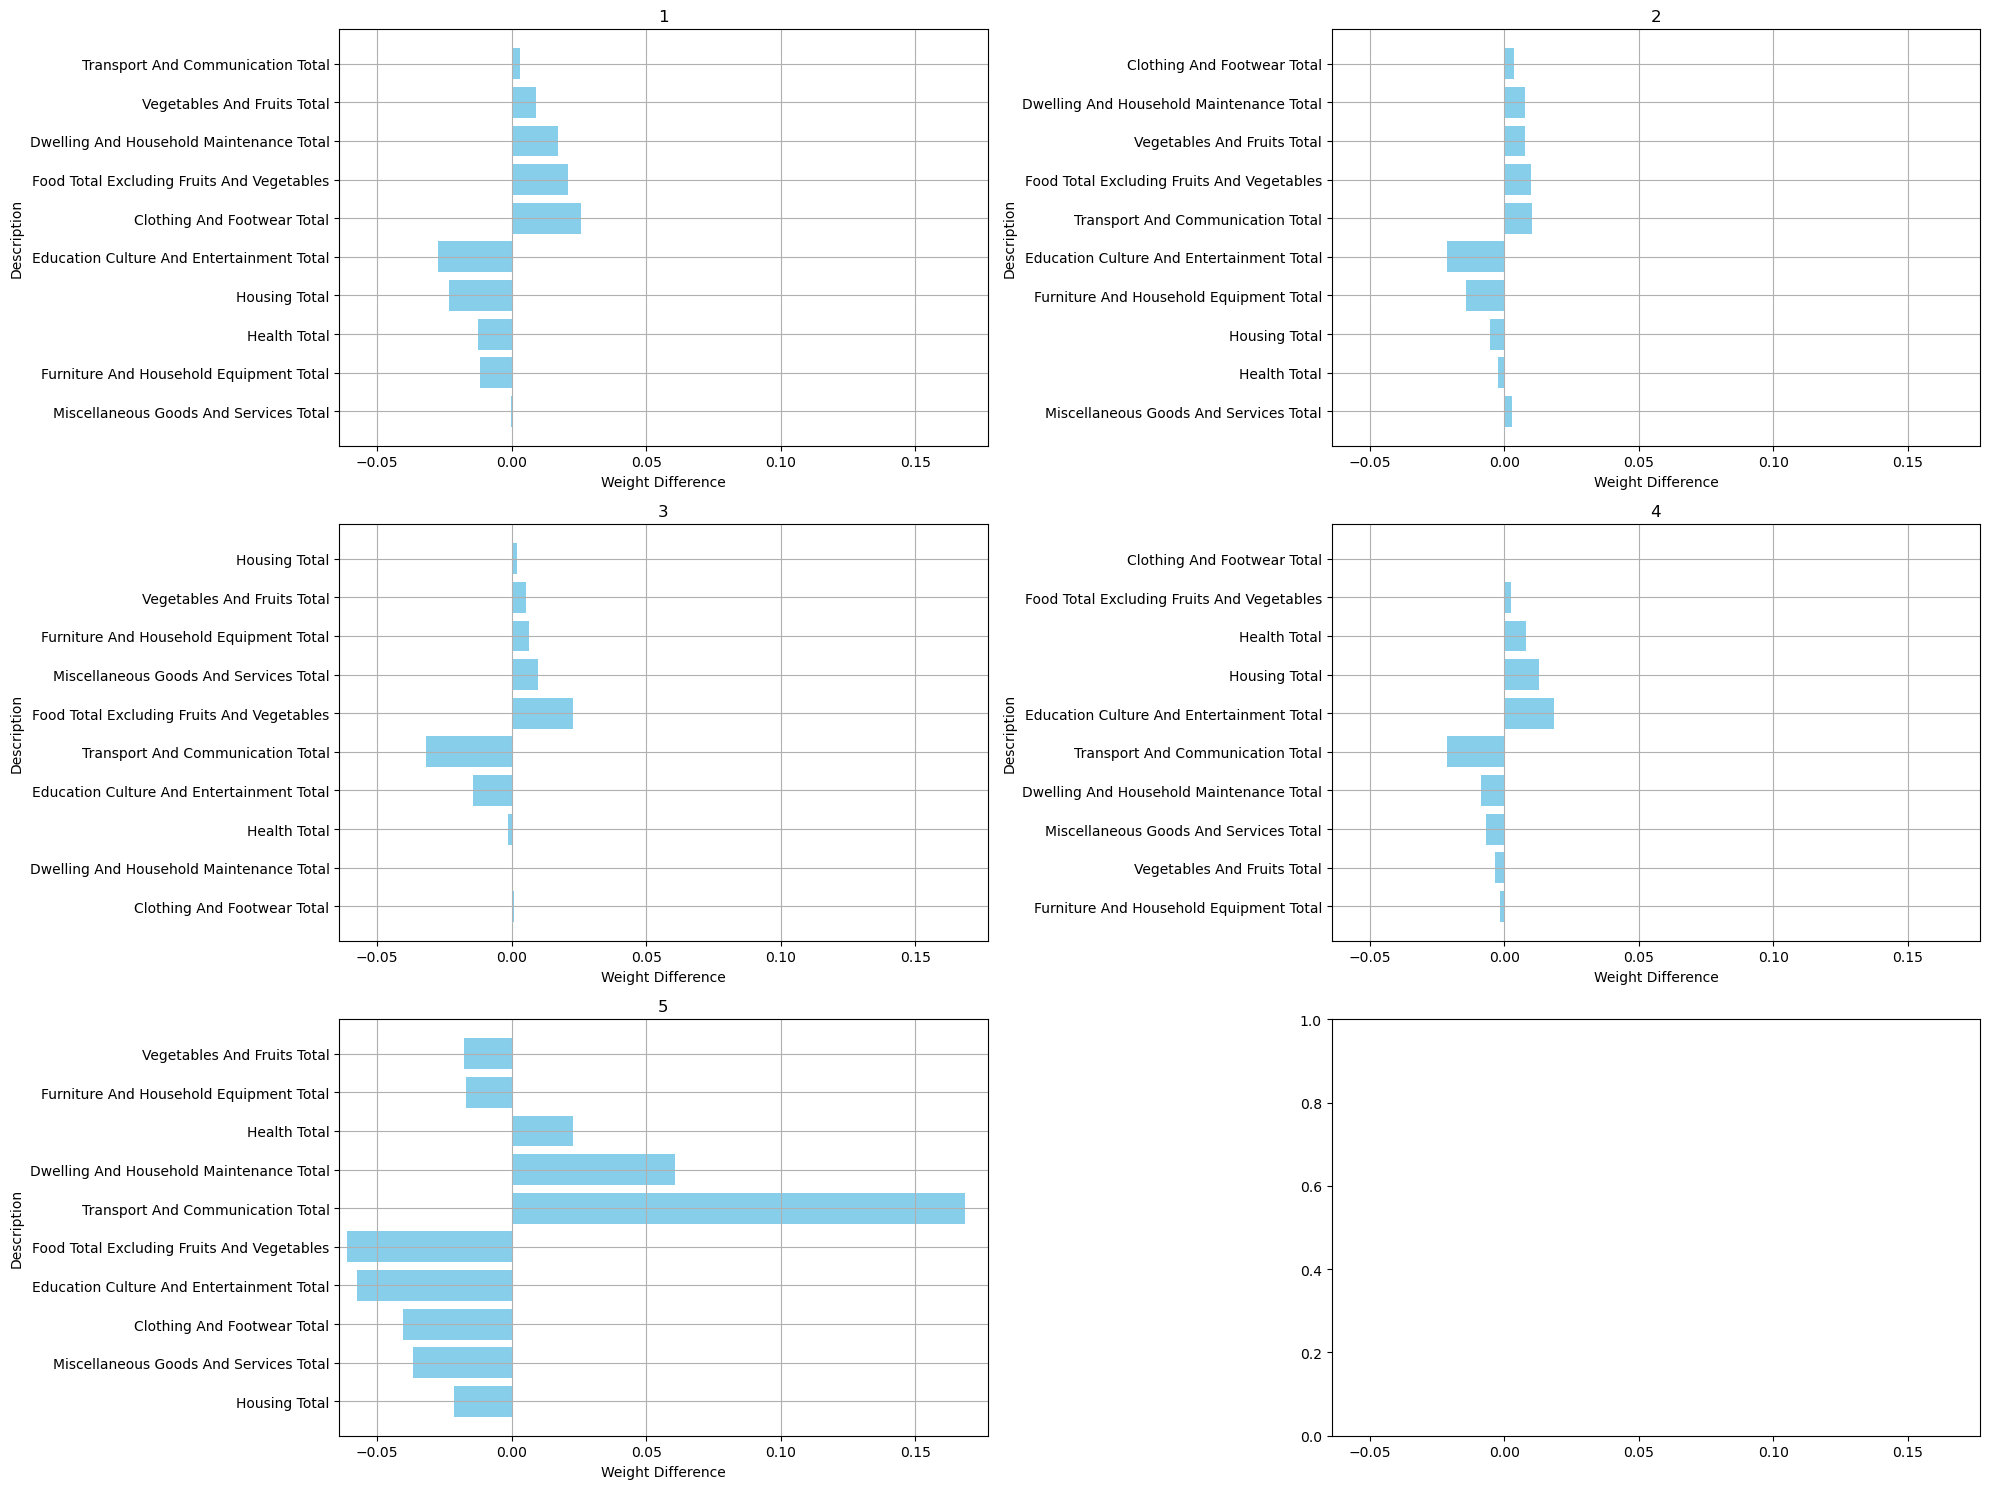

In [15]:
# Top weight differences - SES groups
ses_comparison_groups = {}
for group in ses_analysis:
    ses_comparison_groups[group] = ses_analysis[group][f'combined_{comparison_level}_df'][ses_analysis[group][f'combined_{comparison_level}_df']['Year'] == comparison_year]
top_abs_weight_differences(ses_comparison_groups, weights_comparison_control, top_n)

In [16]:
index_comparison(ses_comparison_groups, weights_comparison_control)

,group,Control,1,2,3,4,5
prodcode,description,,,,,,
30,Food Total Excluding Fruits And Vegetables,129.67(0.2587),147.50(0.2795),135.97(0.2688),132.64(0.2816),119.76(0.2612),112.86(0.1977)
31,Vegetables And Fruits Total,123.00(0.0649),125.83(0.0739),122.07(0.0728),126.70(0.0704),116.48(0.0614),171.36(0.0471)
32,Housing Total,113.42(0.0299),123.87(0.0065),97.77(0.0246),119.02(0.0317),119.29(0.0427),2.25(0.0085)
33,Dwelling And Household Maintenance Total,123.72(0.1042),106.28(0.1213),124.20(0.1121),118.88(0.1046),111.68(0.0957),59.86(0.1651)
34,Furniture And Household Equipment Total,118.53(0.0505),118.35(0.0387),125.80(0.0363),182.31(0.0569),125.66(0.0490),60.30(0.0335)
35,Clothing And Footwear Total,104.40(0.0722),97.96(0.0980),102.90(0.0758),111.08(0.0731),96.78(0.0720),nan(0.0319)
36,Health Total,127.27(0.0537),109.42(0.0410),123.97(0.0515),146.20(0.0523),126.79(0.0619),50.84(0.0763)
37,Education Culture And Entertainment Total,109.47(0.1086),117.92(0.0812),113.31(0.0874),134.59(0.0942),99.43(0.1271),76.62(0.0511)
38,Transport And Communication Total,100.44(0.1821),110.74(0.1851),95.76(0.1925),101.33(0.1502),108.55(0.1609),43.99(0.3506)


### Top Contributors to CPI Change

,Year,prodcode,price_index,weight,description,contribution
81,2022,31,123.871273,0.059133,Vegetables And Fruits Total,8.874882
82,2022,32,115.743909,0.036426,Housing Total,3.605588
87,2022,37,104.020916,0.118493,Education Culture And Entertainment Total,2.995519
85,2022,35,99.355395,0.067909,Clothing And Footwear Total,-0.275217
88,2022,38,99.638609,0.194446,Transport And Communication Total,-0.441804
80,2022,30,125.037954,0.253521,Food Total Excluding Fruits And Vegetables,39.908538
86,2022,36,139.385610,0.057627,Health Total,14.269812
83,2022,33,121.099681,0.092865,Dwelling And Household Maintenance Total,12.319230
89,2022,39,121.903005,0.068515,Miscellaneous Goods And Services Total,9.434970
84,2022,34,128.993361,0.051065,Furniture And Household Equipment Total,9.308482


,Year,prodcode,price_index,weight,description,contribution
81,2022,31,125.611712,0.070611,Vegetables And Fruits Total,7.541453
85,2022,35,109.941675,0.082409,Clothing And Footwear Total,3.416472
84,2022,34,117.810556,0.044826,Furniture And Household Equipment Total,3.329300
82,2022,32,112.681586,0.019577,Housing Total,1.035304
88,2022,38,93.348005,0.190857,Transport And Communication Total,-5.294244
80,2022,30,139.244162,0.267829,Food Total Excluding Fruits And Vegetables,43.830465
87,2022,37,149.201702,0.090086,Education Culture And Entertainment Total,18.483292
83,2022,33,125.151476,0.099759,Dwelling And Household Maintenance Total,10.463041
86,2022,36,145.916153,0.046192,Health Total,8.844621
89,2022,39,122.792507,0.087855,Miscellaneous Goods And Services Total,8.350297


,Year,prodcode,price_index,weight,description,contribution
88,2022,38,108.177429,0.185890,Transport And Communication Total,7.537934
82,2022,32,154.889397,0.024162,Housing Total,6.576440
85,2022,35,114.817303,0.066841,Clothing And Footwear Total,4.911231
86,2022,36,99.916741,0.048408,Health Total,-0.019986
83,2022,33,99.591243,0.138366,Dwelling And Household Maintenance Total,-0.280461
80,2022,30,128.472670,0.267699,Food Total Excluding Fruits And Vegetables,37.796611
84,2022,34,165.392445,0.048874,Furniture And Household Equipment Total,15.848378
81,2022,31,127.225643,0.073698,Vegetables And Fruits Total,9.949759
89,2022,39,129.539129,0.063525,Miscellaneous Goods And Services Total,9.305091
87,2022,37,120.462242,0.082538,Education Culture And Entertainment Total,8.375003


,Year,prodcode,price_index,weight,description,contribution
87,2022,37,119.560523,0.081477,Education Culture And Entertainment Total,6.062166
85,2022,35,114.187599,0.085753,Clothing And Footwear Total,4.627766
89,2022,39,110.232974,0.070120,Miscellaneous Goods And Services Total,2.729327
86,2022,36,105.610548,0.059418,Health Total,1.268043
82,2022,32,97.243248,0.034580,Housing Total,-0.362607
80,2022,30,131.756362,0.305119,Food Total Excluding Fruits And Vegetables,36.856285
88,2022,38,138.156756,0.123288,Transport And Communication Total,17.893831
83,2022,33,137.833215,0.109125,Dwelling And Household Maintenance Total,15.703929
81,2022,31,128.077220,0.082644,Vegetables And Fruits Total,8.826270
84,2022,34,134.682994,0.048474,Furniture And Household Equipment Total,6.394990


,Year,prodcode,price_index,weight,description,contribution
89,2022,39,117.604923,0.081388,Miscellaneous Goods And Services Total,5.466905
82,2022,32,166.718859,0.009020,Housing Total,2.296103
84,2022,34,114.782040,0.032154,Furniture And Household Equipment Total,1.813519
86,2022,36,108.007623,0.038610,Health Total,1.179638
85,2022,35,102.880461,0.094407,Clothing And Footwear Total,1.037564
80,2022,30,152.927184,0.278153,Food Total Excluding Fruits And Vegetables,56.170875
81,2022,31,134.824900,0.075158,Vegetables And Fruits Total,9.986571
83,2022,33,119.561450,0.128231,Dwelling And Household Maintenance Total,9.570660
87,2022,37,120.191941,0.088842,Education Culture And Entertainment Total,6.844598
88,2022,38,108.483797,0.174038,Transport And Communication Total,5.633567


,Year,prodcode,price_index,weight,description,contribution
82,2022,32,133.931362,0.042022,Housing Total,8.287944
86,2022,36,117.389856,0.039494,Health Total,3.991964
88,2022,38,100.683031,0.173574,Transport And Communication Total,0.689112
84,2022,34,92.946542,0.048308,Furniture And Household Equipment Total,-1.980556
85,2022,35,90.972540,0.084941,Clothing And Footwear Total,-4.457072
80,2022,30,129.796773,0.277469,Food Total Excluding Fruits And Vegetables,48.055966
83,2022,33,127.775994,0.093237,Dwelling And Household Maintenance Total,15.053038
89,2022,39,121.450321,0.086234,Miscellaneous Goods And Services Total,10.751695
87,2022,37,119.593215,0.089872,Education Culture And Entertainment Total,10.235116
81,2022,31,124.865827,0.064849,Vegetables And Fruits Total,9.372795


,Year,prodcode,price_index,weight,description,contribution
87,2022,37,129.752342,0.074992,Education Culture And Entertainment Total,6.894719
82,2022,32,172.779386,0.021093,Housing Total,4.743726
89,2022,39,120.693851,0.067820,Miscellaneous Goods And Services Total,4.336922
88,2022,38,105.075280,0.145014,Transport And Communication Total,2.274321
85,2022,35,99.614828,0.047335,Clothing And Footwear Total,-0.056340
83,2022,33,170.643074,0.127082,Dwelling And Household Maintenance Total,27.741996
80,2022,30,130.378708,0.282267,Food Total Excluding Fruits And Vegetables,26.497925
86,2022,36,139.446588,0.095248,Health Total,11.610447
81,2022,31,129.735488,0.090768,Vegetables And Fruits Total,8.340441
84,2022,34,150.938399,0.048383,Furniture And Household Equipment Total,7.615842


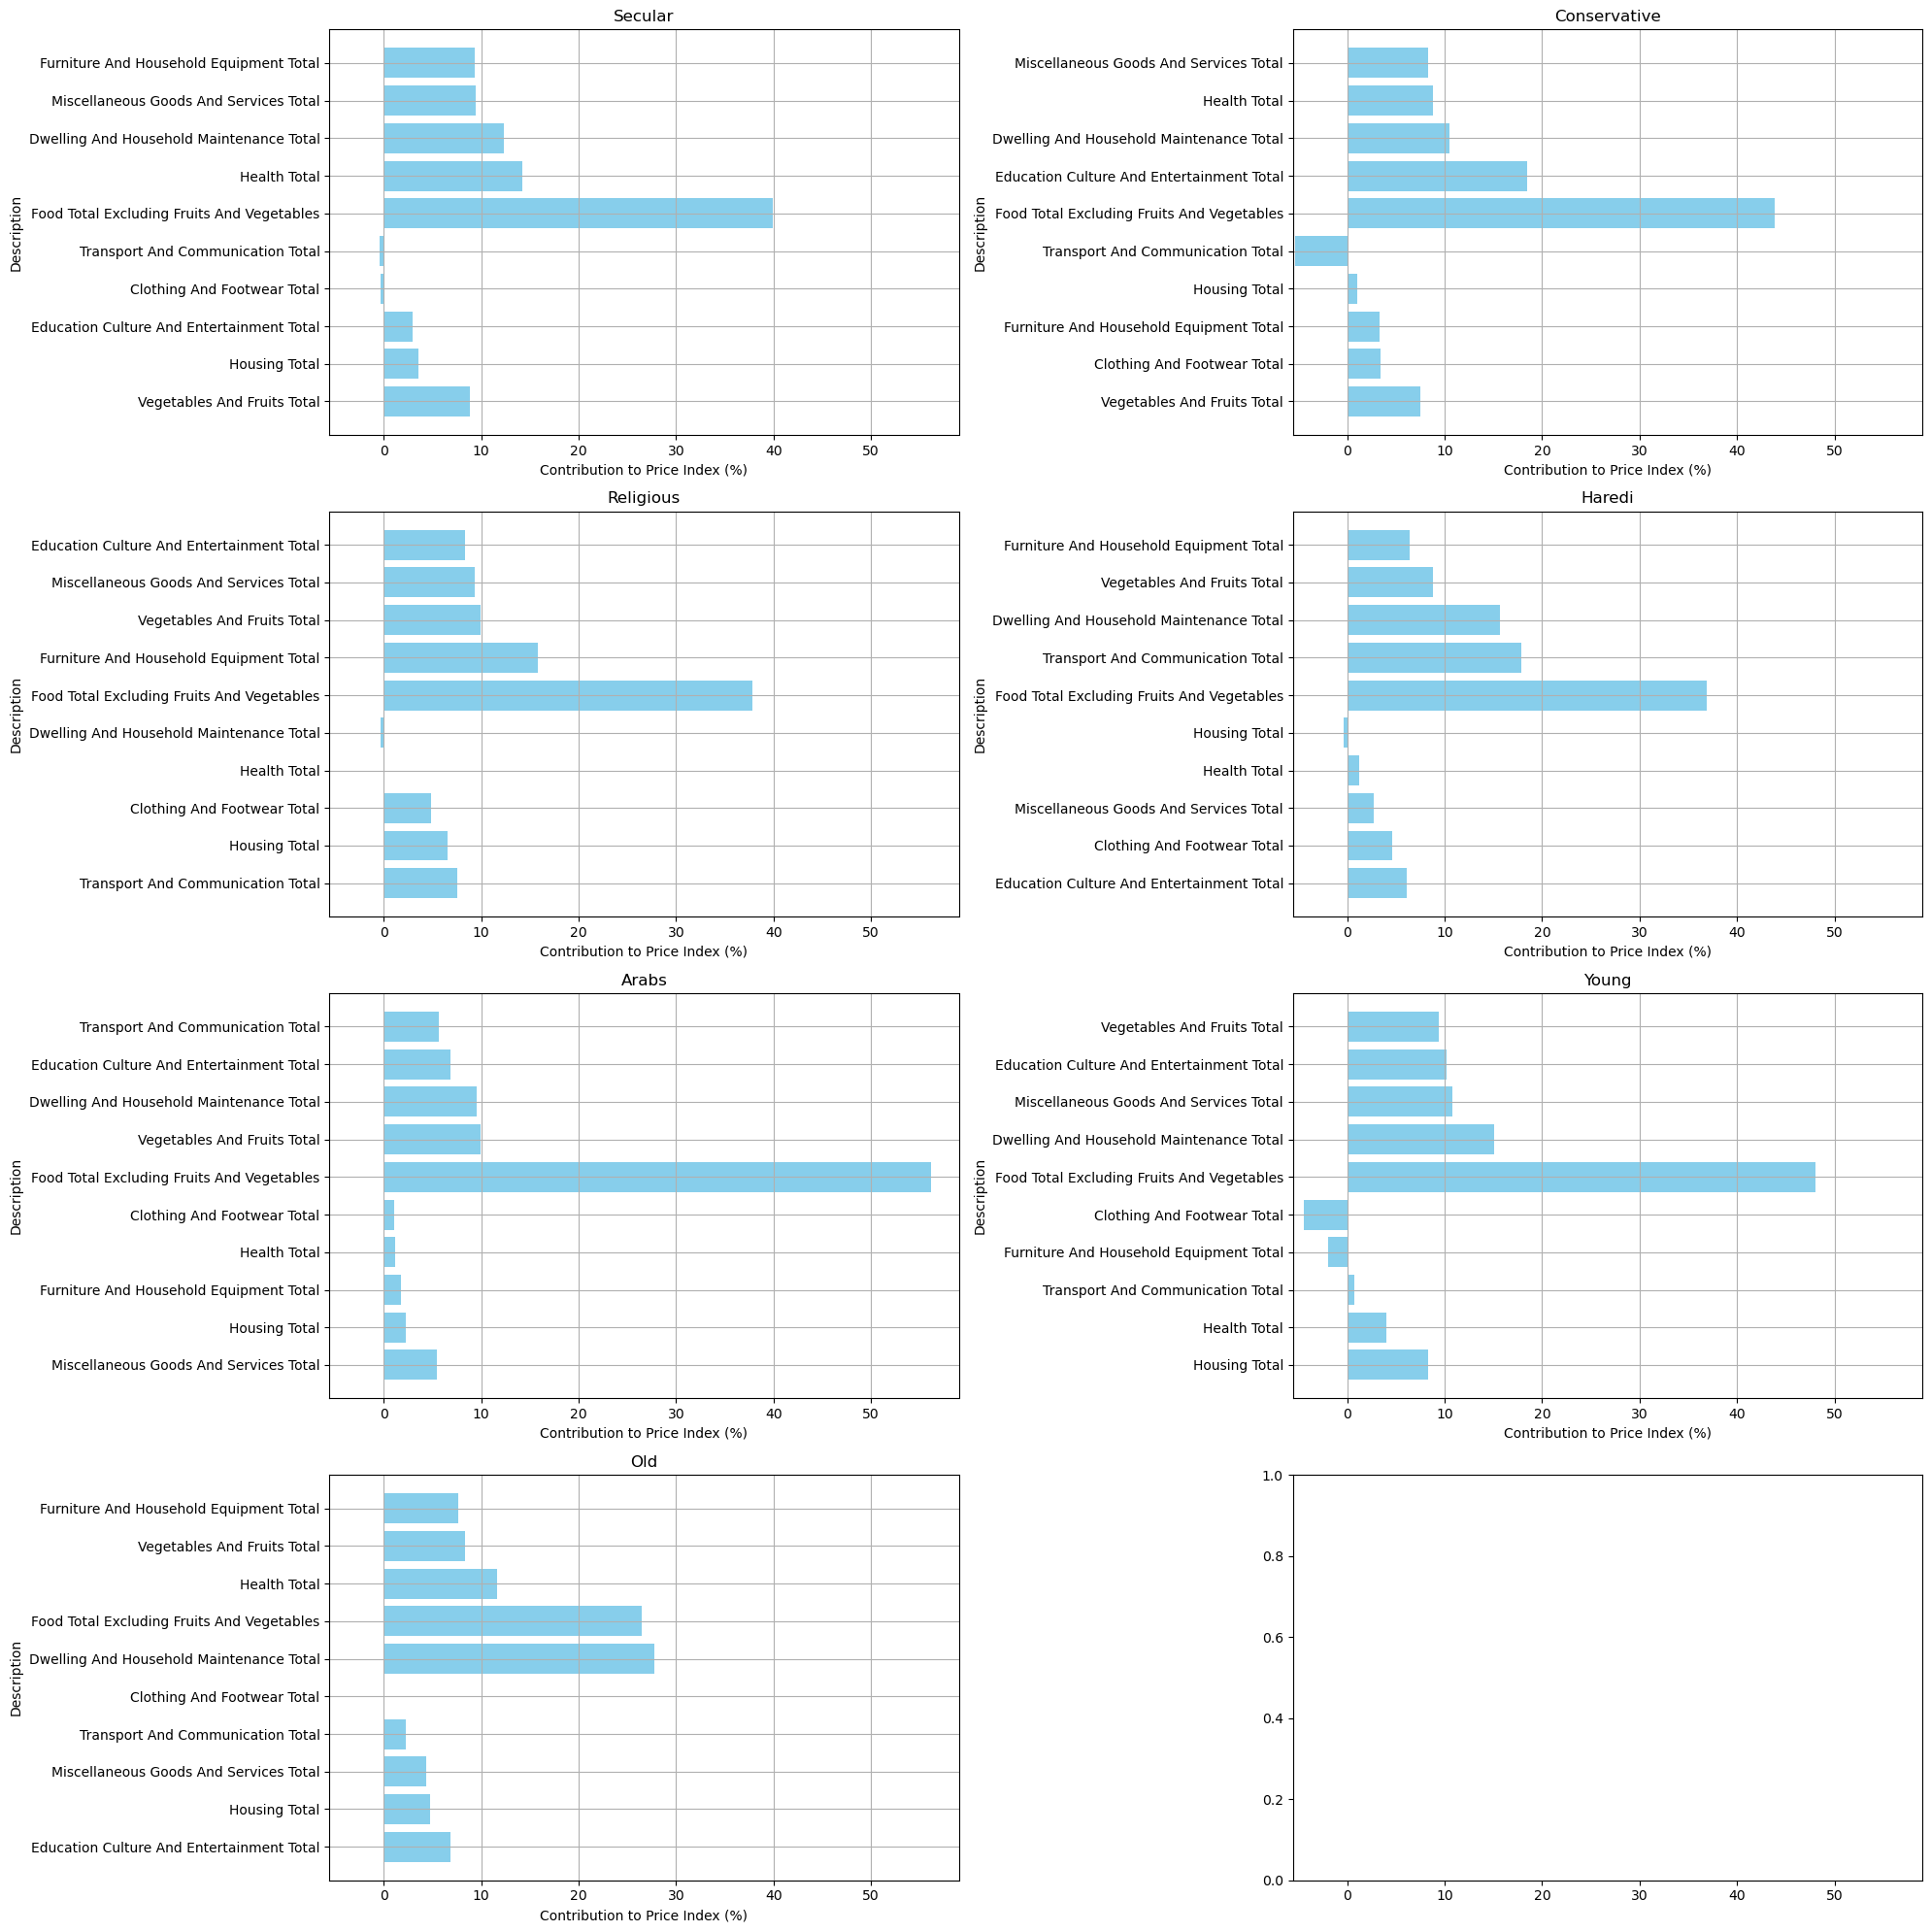

In [17]:
# Top contributors - demographic groups
demo_yearly_price_indexes = {}
for group in demo_analysis:
    demo_yearly_price_indexes[group] = demo_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(demo_comparison_groups, demo_yearly_price_indexes, top_n)

,Year,prodcode,price_index,weight,description,contribution
83,2022,33,115.460750,0.112466,Dwelling And Household Maintenance Total,7.194792
86,2022,36,140.654533,0.040897,Health Total,6.879646
85,2022,35,118.811748,0.076073,Clothing And Footwear Total,5.921405
84,2022,34,129.088342,0.023218,Furniture And Household Equipment Total,2.794493
87,2022,37,95.811640,0.074812,Education Culture And Entertainment Total,-1.296529
80,2022,30,134.946437,0.314222,Food Total Excluding Fruits And Vegetables,45.436555
81,2022,31,132.011098,0.079137,Vegetables And Fruits Total,10.482075
89,2022,39,121.967730,0.088733,Miscellaneous Goods And Services Total,8.065627
82,2022,32,130.608098,0.057821,Housing Total,7.322943
88,2022,38,113.118694,0.132622,Transport And Communication Total,7.198994


,Year,prodcode,price_index,weight,description,contribution
88,2022,38,108.323297,0.126761,Transport And Communication Total,4.190454
87,2022,37,105.690495,0.077133,Education Culture And Entertainment Total,1.743288
84,2022,34,111.585442,0.032430,Furniture And Household Equipment Total,1.492230
85,2022,35,101.369205,0.083167,Clothing And Footwear Total,0.452272
86,2022,36,99.874909,0.050322,Health Total,-0.025001
80,2022,30,137.864659,0.307805,Food Total Excluding Fruits And Vegetables,46.290405
83,2022,33,137.057558,0.116200,Dwelling And Household Maintenance Total,17.102718
81,2022,31,132.658802,0.082322,Vegetables And Fruits Total,10.678238
82,2022,32,157.322445,0.040274,Housing Total,9.169077
89,2022,39,126.827307,0.083587,Miscellaneous Goods And Services Total,8.906319


,Year,prodcode,price_index,weight,description,contribution
81,2022,31,123.830353,0.076678,Vegetables And Fruits Total,5.855400
89,2022,39,118.723676,0.081300,Miscellaneous Goods And Services Total,4.877930
84,2022,34,121.452888,0.038379,Furniture And Household Equipment Total,2.638325
86,2022,36,114.222577,0.056333,Health Total,2.567414
82,2022,32,77.454315,0.048132,Housing Total,-3.477401
80,2022,30,132.810609,0.294554,Food Total Excluding Fruits And Vegetables,30.969429
87,2022,37,227.977896,0.069504,Education Culture And Entertainment Total,28.503348
83,2022,33,139.189305,0.089775,Dwelling And Household Maintenance Total,11.274005
88,2022,38,116.885019,0.161987,Transport And Communication Total,8.764681
85,2022,35,130.049962,0.083358,Clothing And Footwear Total,8.026870


,Year,prodcode,price_index,weight,description,contribution
88,2022,38,111.048650,0.151995,Transport And Communication Total,7.151150
83,2022,33,111.481483,0.129490,Dwelling And Household Maintenance Total,6.330984
85,2022,35,119.755758,0.066303,Clothing And Footwear Total,5.577809
84,2022,34,116.100078,0.039759,Furniture And Household Equipment Total,2.725834
87,2022,37,98.172014,0.085767,Education Culture And Entertainment Total,-0.667623
80,2022,30,130.294903,0.286866,Food Total Excluding Fruits And Vegetables,37.007088
86,2022,36,160.831371,0.043573,Health Total,11.287049
89,2022,39,133.303663,0.077865,Miscellaneous Goods And Services Total,11.042528
81,2022,31,131.281541,0.075054,Vegetables And Fruits Total,9.997616
82,2022,32,151.747211,0.043328,Housing Total,9.547565


,Year,prodcode,price_index,weight,description,contribution
86,2022,36,145.595712,0.053154,Health Total,6.358403
89,2022,39,130.931906,0.077043,Miscellaneous Goods And Services Total,6.252173
84,2022,34,134.319706,0.036132,Furniture And Household Equipment Total,3.253323
82,2022,32,138.353216,0.025932,Housing Total,2.609362
85,2022,35,90.616395,0.092602,Clothing And Footwear Total,-2.279708
87,2022,37,209.769341,0.098976,Education Culture And Entertainment Total,28.503756
80,2022,30,135.737758,0.289401,Food Total Excluding Fruits And Vegetables,27.134167
88,2022,38,127.876045,0.153969,Transport And Communication Total,11.260391
83,2022,33,137.991870,0.099811,Dwelling And Household Maintenance Total,9.948481
81,2022,31,136.348868,0.072980,Vegetables And Fruits Total,6.959652


,Year,prodcode,price_index,weight,description,contribution
86,2022,36,136.606968,0.055138,Health Total,9.311004
85,2022,35,116.879390,0.073889,Clothing And Footwear Total,5.753276
88,2022,38,105.121708,0.163281,Transport And Communication Total,3.857714
87,2022,37,101.527568,0.090545,Education Culture And Entertainment Total,0.638037
82,2022,32,97.496366,0.030085,Housing Total,-0.347456
80,2022,30,128.168354,0.287530,Food Total Excluding Fruits And Vegetables,37.361499
84,2022,34,175.026903,0.042921,Furniture And Household Equipment Total,14.854855
89,2022,39,127.737478,0.075367,Miscellaneous Goods And Services Total,9.643353
83,2022,33,119.378523,0.107347,Dwelling And Household Maintenance Total,9.595964
81,2022,31,127.375392,0.073896,Vegetables And Fruits Total,9.331754


,Year,prodcode,price_index,weight,description,contribution
87,2022,37,114.123312,0.097915,Education Culture And Entertainment Total,4.923599
84,2022,34,128.090316,0.041420,Furniture And Household Equipment Total,4.142465
82,2022,32,127.022817,0.031974,Housing Total,3.076251
85,2022,35,106.162316,0.073905,Clothing And Footwear Total,1.621499
88,2022,38,89.754408,0.167272,Transport And Communication Total,-6.101764
83,2022,33,223.829623,0.104009,Dwelling And Household Maintenance Total,45.855413
80,2022,30,124.853003,0.291126,Food Total Excluding Fruits And Vegetables,25.760643
89,2022,39,130.853381,0.073395,Miscellaneous Goods And Services Total,8.062409
86,2022,36,137.180553,0.049652,Health Total,6.572763
81,2022,31,124.657576,0.069332,Vegetables And Fruits Total,6.086721


,Year,prodcode,price_index,weight,description,contribution
80,2022,31,119.024847,0.068978,Vegetables And Fruits Total,6.674229
85,2022,36,120.681438,0.063352,Health Total,6.663630
84,2022,35,112.321821,0.078761,Clothing And Footwear Total,4.935793
81,2022,32,78.646314,0.026239,Housing Total,-2.849608
87,2022,38,93.360076,0.154350,Transport And Communication Total,-5.212406
79,2022,30,137.470869,0.277233,Food Total Excluding Fruits And Vegetables,52.833360
86,2022,37,125.745016,0.114204,Education Culture And Entertainment Total,14.953527
88,2022,39,121.781681,0.074670,Miscellaneous Goods And Services Total,8.271895
82,2022,33,115.969231,0.085149,Dwelling And Household Maintenance Total,6.915635
83,2022,34,123.478094,0.057065,Furniture And Household Equipment Total,6.813944


,Year,prodcode,price_index,weight,description,contribution
84,2022,34,111.823910,0.047864,Furniture And Household Equipment Total,3.958414
83,2022,33,104.355661,0.113737,Dwelling And Household Maintenance Total,3.465033
82,2022,32,120.572665,0.022146,Housing Total,3.186634
85,2022,35,101.463656,0.066129,Clothing And Footwear Total,0.676993
88,2022,38,99.996972,0.171097,Transport And Communication Total,-0.003624
80,2022,30,121.421303,0.265471,Food Total Excluding Fruits And Vegetables,39.775350
86,2022,36,148.105228,0.069357,Health Total,23.336437
87,2022,37,113.206718,0.103635,Education Culture And Entertainment Total,9.573151
81,2022,31,120.160408,0.066783,Vegetables And Fruits Total,9.417048
89,2022,39,112.817495,0.073781,Miscellaneous Goods And Services Total,6.614566


,Year,prodcode,price_index,weight,description,contribution
82,2022,33,105.918025,0.105057,Dwelling And Household Maintenance Total,15.741867
88,2022,39,103.251380,0.073132,Miscellaneous Goods And Services Total,6.020500
84,2022,35,93.824802,0.071842,Clothing And Footwear Total,-11.232752
87,2022,38,91.009114,0.187867,Transport And Communication Total,-42.767013
86,2022,37,72.139459,0.144809,Education Culture And Entertainment Total,-102.150295
80,2022,30,120.855150,0.244788,Food Total Excluding Fruits And Vegetables,129.258374
81,2022,31,130.469794,0.057257,Vegetables And Fruits Total,44.172737
85,2022,36,119.316455,0.063817,Health Total,31.212022
83,2022,34,122.841775,0.051431,Furniture And Household Equipment Total,29.744560
82,2022,33,105.918025,0.105057,Dwelling And Household Maintenance Total,15.741867


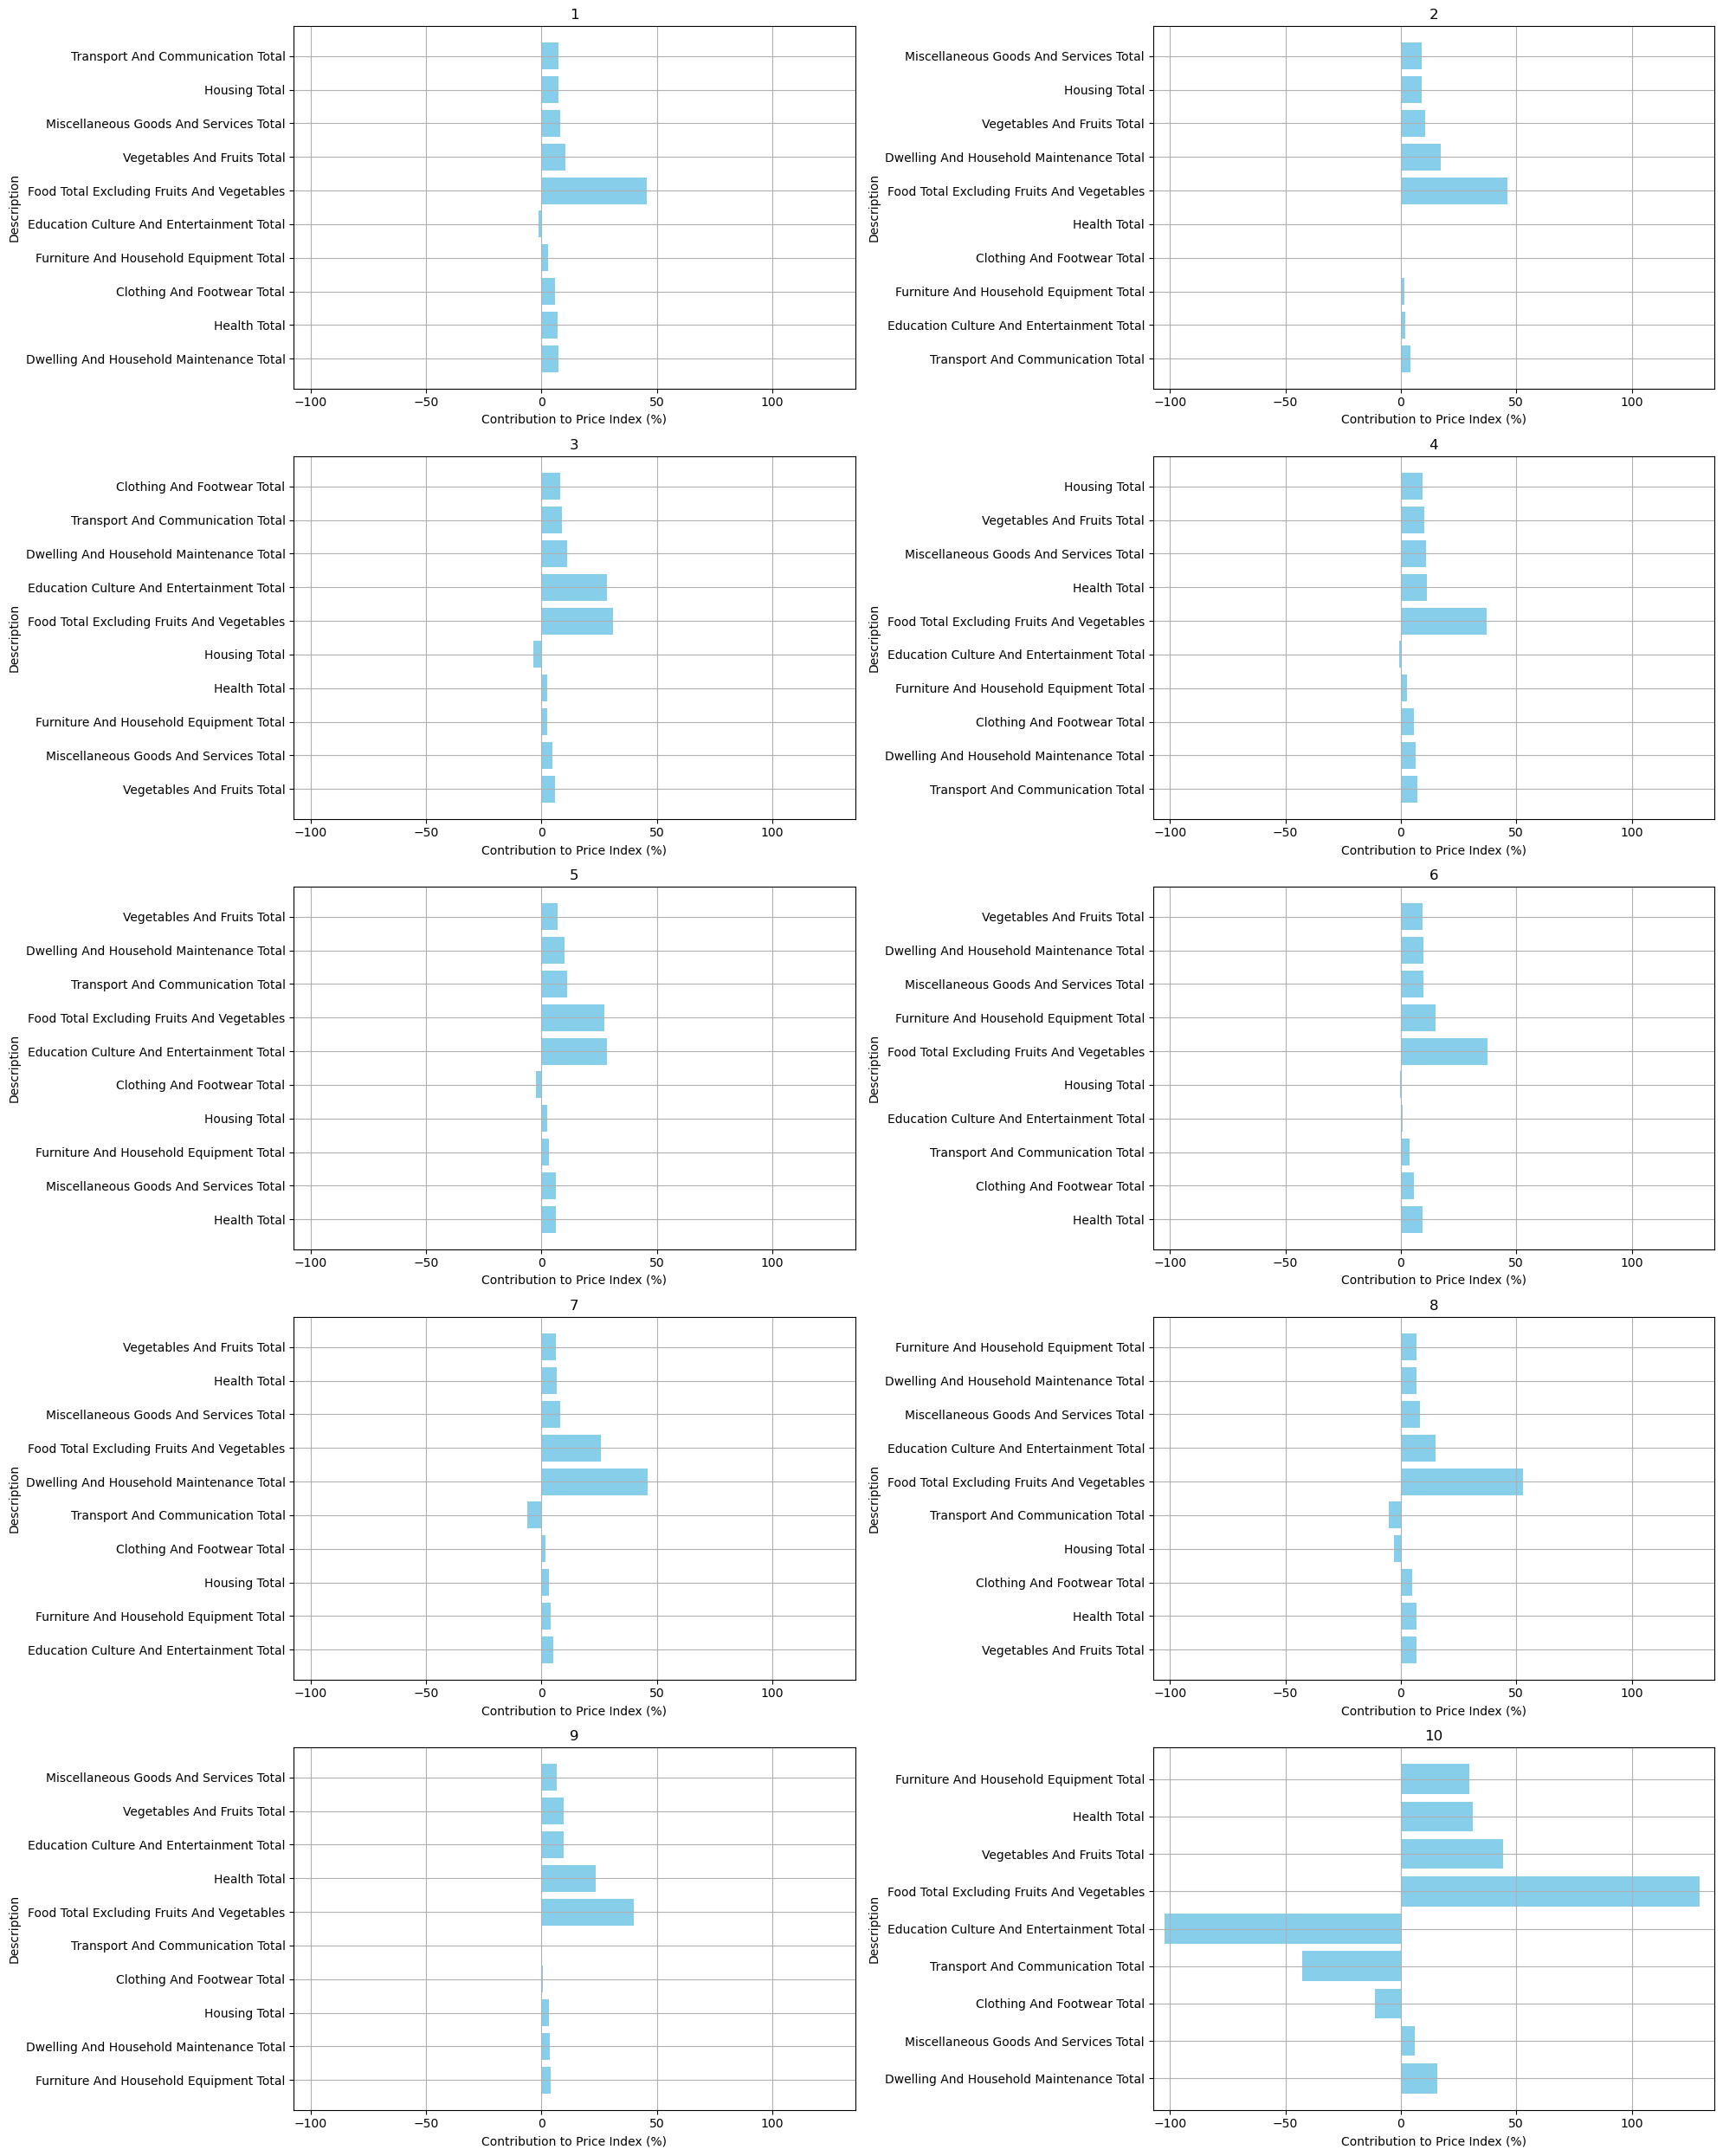

In [18]:
# Top contributors - income groups
income_yearly_price_indexes = {}
for group in income_analysis:
    income_yearly_price_indexes[group] = income_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(income_comparison_groups, income_yearly_price_indexes, top_n)

,Year,prodcode,price_index,weight,description,contribution
83,2022,33,106.281787,0.121346,Dwelling And Household Maintenance Total,3.499748
84,2022,34,118.351680,0.038747,Furniture And Household Equipment Total,3.264721
86,2022,36,109.415062,0.040972,Health Total,1.771100
82,2022,32,123.870951,0.006461,Housing Total,0.708139
85,2022,35,97.955036,0.097961,Clothing And Footwear Total,-0.919748
80,2022,30,147.501697,0.279487,Food Total Excluding Fruits And Vegetables,60.953619
88,2022,38,110.736869,0.185131,Transport And Communication Total,9.126129
81,2022,31,125.827490,0.073874,Vegetables And Fruits Total,8.760014
87,2022,37,117.920797,0.081227,Education Culture And Entertainment Total,6.683256
89,2022,39,117.918737,0.074792,Miscellaneous Goods And Services Total,6.153022


,Year,prodcode,price_index,weight,description,contribution
87,2022,37,113.311706,0.087375,Education Culture And Entertainment Total,6.051217
84,2022,34,125.799552,0.036340,Furniture And Household Equipment Total,4.877768
85,2022,35,102.898830,0.075791,Clothing And Footwear Total,1.143044
82,2022,32,97.771110,0.024636,Housing Total,-0.285679
88,2022,38,95.764503,0.192540,Transport And Communication Total,-4.242768
80,2022,30,135.973125,0.268756,Food Total Excluding Fruits And Vegetables,50.299168
83,2022,33,124.201319,0.112074,Dwelling And Household Maintenance Total,14.111294
89,2022,39,132.616117,0.078142,Miscellaneous Goods And Services Total,13.259832
81,2022,31,122.069767,0.072839,Vegetables And Fruits Total,8.363407
86,2022,36,123.967341,0.051508,Health Total,6.422716


,Year,prodcode,price_index,weight,description,contribution
81,2022,31,126.703743,0.070381,Vegetables And Fruits Total,7.027610
89,2022,39,120.352670,0.085020,Miscellaneous Goods And Services Total,6.470270
85,2022,35,111.079887,0.073116,Clothing And Footwear Total,3.029210
82,2022,32,119.022045,0.031713,Housing Total,2.255710
88,2022,38,101.325826,0.150240,Transport And Communication Total,0.744828
80,2022,30,132.635349,0.281561,Food Total Excluding Fruits And Vegetables,34.359193
84,2022,34,182.312488,0.056894,Furniture And Household Equipment Total,17.511122
87,2022,37,134.594065,0.094165,Education Culture And Entertainment Total,12.180739
86,2022,36,146.195520,0.052324,Health Total,9.038288
83,2022,33,118.878994,0.104586,Dwelling And Household Maintenance Total,7.383030


,Year,prodcode,price_index,weight,description,contribution
83,2022,33,111.675104,0.095652,Dwelling And Household Maintenance Total,8.350360
81,2022,31,116.477916,0.061365,Vegetables And Fruits Total,7.560870
82,2022,32,119.292267,0.042745,Housing Total,6.166240
87,2022,37,99.430890,0.127068,Education Culture And Entertainment Total,-0.540731
85,2022,35,96.780656,0.071981,Clothing And Footwear Total,-1.732733
80,2022,30,119.760215,0.261172,Food Total Excluding Fruits And Vegetables,38.589384
86,2022,36,126.792788,0.061918,Health Total,12.404628
88,2022,38,108.547948,0.160880,Transport And Communication Total,10.282862
89,2022,39,118.653190,0.068194,Miscellaneous Goods And Services Total,9.511461
84,2022,34,125.664055,0.049024,Furniture And Household Equipment Total,9.407660


,Year,prodcode,price_index,weight,description,contribution
87,2022,37,76.623640,0.051119,Education Culture And Entertainment Total,4.227710
82,2022,32,2.245614,0.008526,Housing Total,2.948711
89,2022,39,82.934879,0.038264,Miscellaneous Goods And Services Total,2.310154
80,2022,30,112.855790,0.197677,Food Total Excluding Fruits And Vegetables,-8.990786
81,2022,31,171.355387,0.047096,Vegetables And Fruits Total,-11.889121
88,2022,38,43.990496,0.350590,Transport And Communication Total,69.471018
83,2022,33,59.861293,0.165114,Dwelling And Household Maintenance Total,23.447095
86,2022,36,50.843047,0.076282,Health Total,13.266340
84,2022,34,60.304089,0.033452,Furniture And Household Equipment Total,4.697954
87,2022,37,76.623640,0.051119,Education Culture And Entertainment Total,4.227710


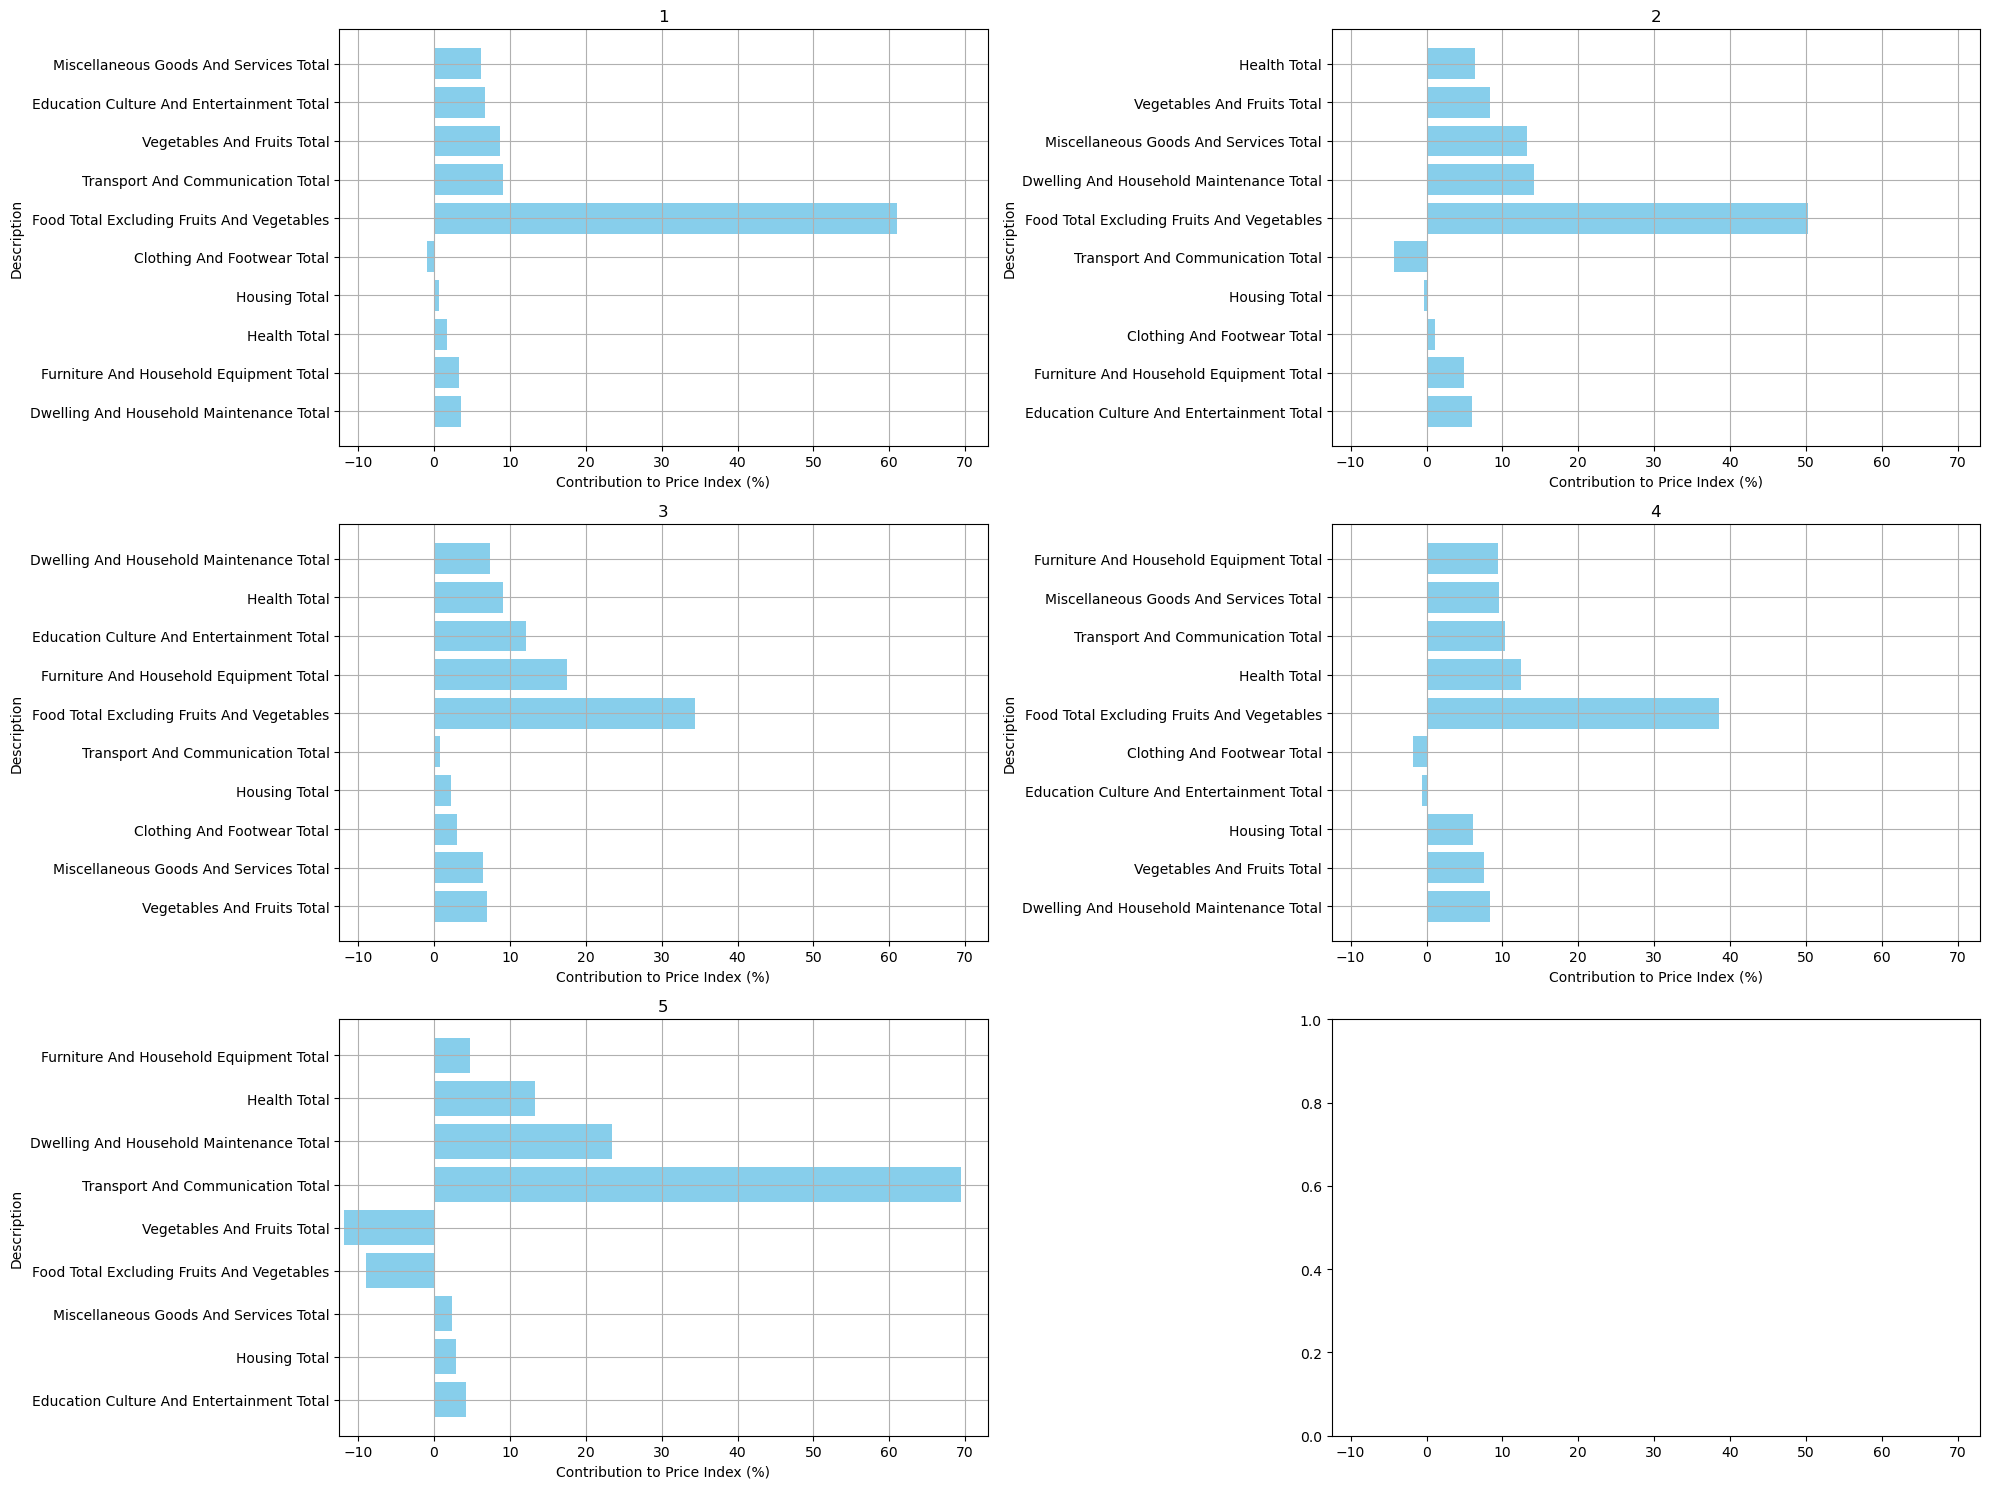

In [19]:
# Top contributors - SES groups
ses_yearly_price_indexes = {}
for group in ses_analysis:
    ses_yearly_price_indexes[group] = ses_analysis[group]['yearly_price_index'][comparison_year]
top_price_index_contributors(ses_comparison_groups, ses_yearly_price_indexes, top_n)

In [3]:
# Export to html [--no-input]
!jupyter nbconvert --to html Tri_Group_inflation_comparison.ipynb 

[NbConvertApp] Converting notebook Tri_Group_inflation_comparison.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 3330316 bytes to Tri_Group_inflation_comparison.html
